In [1]:

# THIS FILE PLOTS ALL THE FORCE CURVES IN A GRID FOR 1NN, 2NN AND 3NN

import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/installs')

In [4]:
dir = '/content/drive/MyDrive/QE_Fe/PBE/High-pressure/2.49_5000K/'
nstep = 172

In [5]:

derivative = np.load(dir + '1_NN_Forces_idlt_'+str(nstep)+'_200.npy')

In [6]:
derivative[:,3,:]

array([[-4.81794731, -5.10606222, -5.1994182 , ..., -3.65269333,
         0.03330896, -0.03125144],
       [-0.54177596, -3.64454585, -4.50511138, ..., -0.46059291,
         1.46727947,  2.61478645],
       [-1.33284309, -2.98603926, -4.60388227, ...,  4.43512169,
         3.22825818,  0.83293134],
       ...,
       [ 2.85735738,  4.81278711,  7.09955154, ..., -4.57185144,
        -3.59227831, -2.24249604],
       [ 1.81322009,  3.58545058,  5.66200185, ..., -4.88007139,
        -4.70549124, -2.53298868],
       [ 2.310816  ,  4.06166994,  5.88864284, ..., -3.39460972,
        -2.88812602, -1.33608966]])

In [ ]:
derivative.shape

(128, 4, 21)

In [ ]:
"""

import numpy as np
import matplotlib.pyplot as plt

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('xtick.major', size=6, width=2.5)
plt.rc('ytick.major', size=6, width=2.5)
plt.rc('xtick.minor', size=4, width=1.5)
plt.rc('ytick.minor', size=4, width=1.5)

# Derivative fit for a polynomial
def der(fit, x):
    poly = 0
    for i in range(1, len(fit)):
        poly += i * fit[len(fit) - i - 1] * (x ** (i - 1))
    return poly

np.random.seed(0)
nstep = np.random.choice(range(220))
avg_residue = 0
ts = 20  # Number of steps
max_displacement = 0.51
min_displacement = -0.51
step = (max_displacement - min_displacement) / ts
var = np.linspace(min_displacement - step, max_displacement + step, num=ts + 3)
a_deriv = np.zeros((128, 4, ts + 1))  # Analytical derivative
m = [np.array([1, 1, 1]), np.array([-1, 1, 1]), np.array([1, -1, 1]), np.array([-1, -1, 1])]
p = 0

# Create the figure with adjusted layout
fig, ax = plt.subplots(2, 4, figsize=(23, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Increase space between plots

# Load data
dir = '/content/drive/MyDrive/QE_Fe/PBE/High-pressure/2.36_5000K/'
derivative = np.load(dir + '1NN_Forces_idlt_' + str(nstep) + '_220.npy')
miny = np.min(-derivative[:, :, :])
maxy = np.max(-derivative[:, :, :])

for nstep in [nstep]:
    derivative = np.load(dir + '1NN_Forces_idlt_' + str(nstep) + '_220.npy')
    prediction = np.load(dir + '1NN_Energies_idlt_' + str(nstep) + '_220.npy')

    for d in range(4):
        ax[2 * p, d].set_facecolor('black')
        ax[2 * p, d].axhline(y=0, color='w')
        ax[2 * p, d].axvline(x=0, color='w')
        ax[2 * p, d].set_xlim([min_displacement, max_displacement])
        ax[2 * p, d].set_ylim([miny, maxy])
        ax[2 * p, d].set_title(f'Stp {nstep},  {m[d]}, N. app.', fontsize=20)
        ax[2 * p, d].set_xlabel(r'Displacement ($\AA$)', fontsize=20)
        ax[2 * p, d].set_ylabel(r'Force (eV/$\AA$)', fontsize=20)

        # Set tick font size
        #ax[2 * p + 1, d].tick_params(axis='both', which='major', labelsize=25)



        avg = np.zeros(ts + 1)
        for i in range(128):
            ax[2 * p, d].plot(var[1:ts + 2], -derivative[i, d, :], '-w', alpha=0.05)
            avg -= derivative[i, d, :]

        avg /= 128
        ax[2 * p, d].plot(var[1:ts + 2], avg, color='orange', linestyle='-')  # Change line to orange

        for i in range(128):
            fit, residuals, _, _, _ = np.polyfit(
                var[1:ts + 2], prediction[(4 * i + d) * (ts + 3) + 1: (4 * i + d) * (ts + 3) + ts + 2],
                10, full=True
            )
            avg_residue += residuals[0]
            a_deriv[i, d, :] = der(fit, var[1:ts + 2])

        ax[2 * p + 1, d].set_facecolor('black')
        ax[2 * p + 1, d].axhline(y=0, color='w')
        ax[2 * p + 1, d].axvline(x=0, color='w')
        ax[2 * p + 1, d].set_xlim([min_displacement, max_displacement])
        ax[2 * p + 1, d].set_ylim([miny, maxy])
        ax[2 * p + 1, d].set_title(f'Stp {nstep},  {m[d]}, A. app.', fontsize=20)
        ax[2 * p + 1, d].set_xlabel(r'Displacement ($\mathrm{\AA}$)', fontsize=20)
        ax[2 * p + 1, d].set_ylabel(r'Force (eV/$\mathrm{\AA}$)', fontsize=20)



        avg = np.zeros(ts + 1)
        for i in range(128):
            ax[2 * p + 1, d].plot(var[1:ts + 2], -a_deriv[i, d, :], '-w', alpha=0.05)
            avg -= a_deriv[i, d, :]

        avg /= 128
        ax[2 * p + 1, d].plot(var[1:ts + 2], avg, color='orange', linestyle='-')  # Change line to orange

    p += 1

plt.savefig(dir + '1NN_Forces_Updated.png')
avg_residue /= 128 * 3 * 4
print(f'Average Residue: {avg_residue}')

"""

"\n\nimport numpy as np\nimport matplotlib.pyplot as plt\n\nplt.rc('xtick', labelsize=20)\nplt.rc('ytick', labelsize=20)\nplt.rc('xtick.major', size=6, width=2.5)\nplt.rc('ytick.major', size=6, width=2.5)\nplt.rc('xtick.minor', size=4, width=1.5)\nplt.rc('ytick.minor', size=4, width=1.5)\n\n# Derivative fit for a polynomial\ndef der(fit, x):\n    poly = 0\n    for i in range(1, len(fit)):\n        poly += i * fit[len(fit) - i - 1] * (x ** (i - 1))\n    return poly\n\nnp.random.seed(0)\nnstep = np.random.choice(range(220))\navg_residue = 0\nts = 20  # Number of steps\nmax_displacement = 0.51\nmin_displacement = -0.51\nstep = (max_displacement - min_displacement) / ts\nvar = np.linspace(min_displacement - step, max_displacement + step, num=ts + 3)\na_deriv = np.zeros((128, 4, ts + 1))  # Analytical derivative\nm = [np.array([1, 1, 1]), np.array([-1, 1, 1]), np.array([1, -1, 1]), np.array([-1, -1, 1])]\np = 0\n\n# Create the figure with adjusted layout\nfig, ax = plt.subplots(2, 4, figsiz

Average Residue: 0.008198784394993457


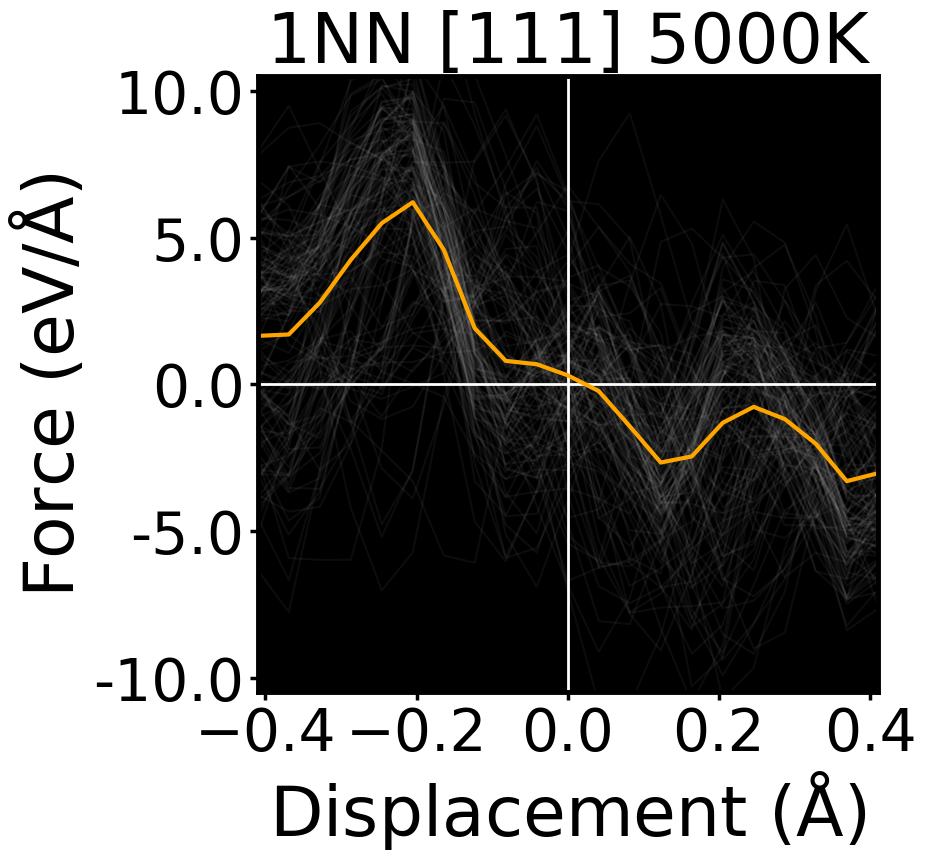

In [7]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('xtick.major', size=6, width=2.5)
plt.rc('ytick.major', size=6, width=2.5)
plt.rc('xtick.minor', size=4, width=1.5)
plt.rc('ytick.minor', size=4, width=1.5)

# Derivative fit for a polynomial
def der(fit, x):
    poly = 0
    for i in range(1, len(fit)):
        poly += i * fit[len(fit) - i - 1] * (x ** (i - 1))
    return poly

np.random.seed(0)
nstep = np.random.choice(range(220))
avg_residue = 0
ts = 20  # Number of steps
max_displacement = 0.41
min_displacement = -0.41
step = (max_displacement - min_displacement) / ts
var = np.linspace(min_displacement - step, max_displacement + step, num=ts + 3)
a_deriv = np.zeros((128, 4, ts + 1))  # Analytical derivative
formatted_directions = ['[111]', '[-111]', '[1-11]', '[-1-11]']


# Select direction and approximation (e.g., [1 1 1] and N. app.)
selected_direction = 0  # [1 1 1] corresponds to index 0
#approximation_type = 'Numerical Approx.'

# Create the figure
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_facecolor('black')
ax.axhline(y=0, color='w', linewidth=2)  # Thicker white line
ax.axvline(x=0, color='w', linewidth=2)  # Thicker white line
ax.set_xlim([min_displacement, max_displacement])
ax.set_ylim([-10.5, 10.5])  # Adjusted limits


# Set y-axis ticks with 1 decimal place and bold style
ax.set_yticks([-10.0, -5.0, 0.0, 5.0, 10.0])
ax.set_yticklabels([f"{tick:.1f}" for tick in [-10.0, -5.0, 0.0, 5.0, 10.0]], fontdict={'weight': 'regular'})


# Set x-axis tick label to bold
for label in ax.get_xticklabels():
    label.set_fontweight('regular')
    label.set_fontsize(42)
for label in ax.get_yticklabels():
    label.set_fontweight('regular')
    label.set_fontsize(42)

# Title and labels with increased font weight and size
ax.set_title(f'1NN {formatted_directions[selected_direction]} 5000K', fontsize=50, fontweight='regular')
ax.set_xlabel(r'Displacement ($\mathrm{\AA}$)', fontsize=50, fontweight='regular')
ax.set_ylabel(r'Force (eV/$\mathrm{\AA}$)', fontsize=50, fontweight='regular')

# Make the x and y axis lines (spines) thicker
for spine in ax.spines.values():
    spine.set_linewidth(3.5)  # Further increased thickness to match the title and labels

# Load data
dir = '/content/drive/MyDrive/QE_Fe/PBE/High-pressure/2.49_5000K/'
derivative = np.load(dir + '1_NN_Forces_idlt_' + str(nstep) + '_200.npy')
prediction = np.load(dir + '1_NN_Energies_idlt_' + str(nstep) + '_200.npy')

# Plot the data for the selected direction
avg = np.zeros(ts + 1)
for i in range(128):
    #ax.plot(var[1:ts + 2], -derivative[i, selected_direction, :], '-w', alpha=0.05, linewidth=1.5)  # Increased white line thickness
    #avg -= derivative[i, selected_direction, :]

    y_data = -derivative[i, selected_direction, :ts + 1]  # Slice to match the size of var[1:ts + 2]
    ax.plot(var[1:ts + 2], y_data, '-w', alpha=0.05, linewidth=1.5)  # Plot with adjusted y_data
    avg += y_data




avg /= 128
ax.plot(var[1:ts + 2], avg, color='orange', linestyle='-', linewidth=3)  # Thicker orange line

# Calculate and plot analytical derivatives if required
for i in range(128):
    fit, residuals, _, _, _ = np.polyfit(
        var[1:ts + 2], prediction[(4 * i + selected_direction) * (ts + 3) + 1: (4 * i + selected_direction) * (ts + 3) + ts + 2],
        10, full=True
    )
    avg_residue += residuals[0]
    a_deriv[i, selected_direction, :] = der(fit, var[1:ts + 2])

plt.savefig(dir + '1_NN_Forces_Single.png')
avg_residue /= 128 * 3 * 4
print(f'Average Residue: {avg_residue}')


Average Residue: 0.007820114300072989


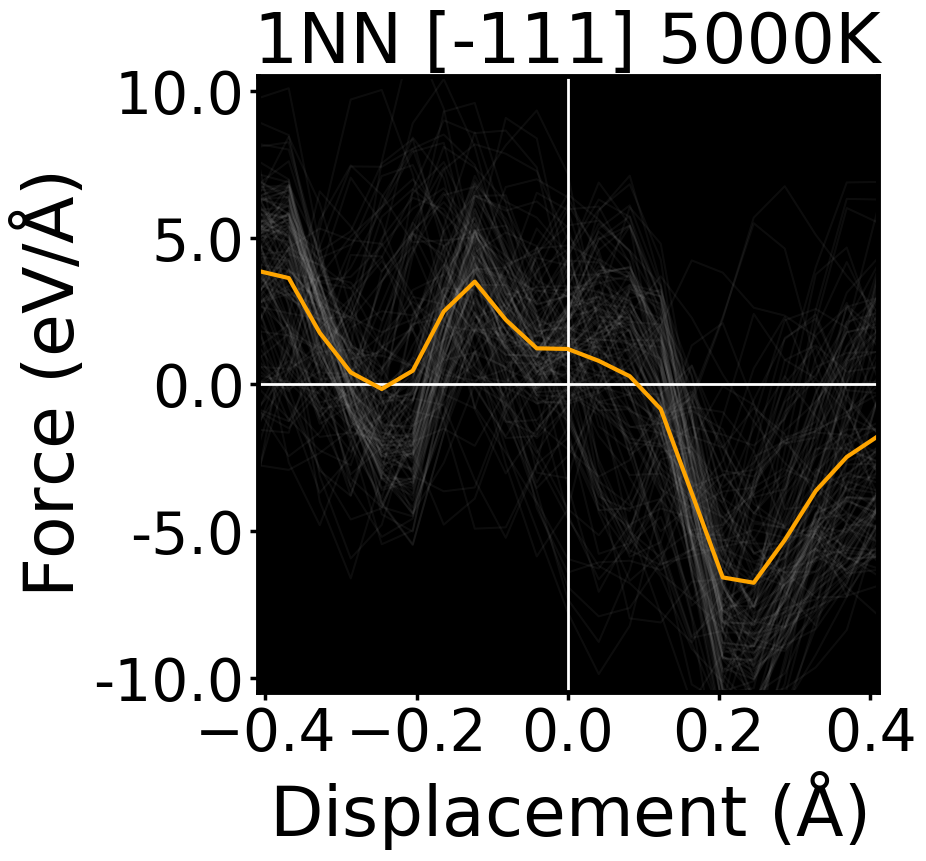

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('xtick.major', size=6, width=2.5)
plt.rc('ytick.major', size=6, width=2.5)
plt.rc('xtick.minor', size=4, width=1.5)
plt.rc('ytick.minor', size=4, width=1.5)

# Derivative fit for a polynomial
def der(fit, x):
    poly = 0
    for i in range(1, len(fit)):
        poly += i * fit[len(fit) - i - 1] * (x ** (i - 1))
    return poly

np.random.seed(0)
nstep = np.random.choice(range(220))
avg_residue = 0
ts = 20  # Number of steps
max_displacement = 0.41
min_displacement = -0.41
step = (max_displacement - min_displacement) / ts
var = np.linspace(min_displacement - step, max_displacement + step, num=ts + 3)
a_deriv = np.zeros((128, 4, ts + 1))  # Analytical derivative
formatted_directions = ['[111]', '[-111]', '[1-11]', '[-1-11]']

# Select direction and approximation ([-1 1 1] for 1NN)
selected_direction = 1  # [-1 1 1] corresponds to index 1
#approximation_type = 'Numerical Approx.'

# Create the figure
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_facecolor('black')
ax.axhline(y=0, color='w', linewidth=2)  # Thicker white line
ax.axvline(x=0, color='w', linewidth=2)  # Thicker white line
ax.set_xlim([min_displacement, max_displacement])
ax.set_ylim([-10.5, 10.5])  # Adjusted limits

# Set y-axis ticks with 1 decimal place and bold style
ax.set_yticks([-10.0, -5.0, 0.0, 5.0, 10.0])
ax.set_yticklabels([f"{tick:.1f}" for tick in [-10.0, -5.0, 0.0, 5.0, 10.0]], fontdict={'weight': 'regular'})


# Set x-axis and y-axis tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('regular')
    label.set_fontsize(42)
for label in ax.get_yticklabels():
    label.set_fontweight('regular')
    label.set_fontsize(42)

# Title and labels with increased font weight and size
ax.set_title(f'1NN {formatted_directions[selected_direction]} 5000K', fontsize=50, fontweight='regular')
ax.set_xlabel(r'Displacement ($\mathrm{\AA}$)', fontsize=50, fontweight='regular')
ax.set_ylabel(r'Force (eV/$\mathrm{\AA}$)', fontsize=50, fontweight='regular')

# Make the x and y axis lines (spines) thicker
for spine in ax.spines.values():
    spine.set_linewidth(3.5)  # Further increased thickness to match the title and labels

# Load data
dir = '/content/drive/MyDrive/QE_Fe/PBE/High-pressure/2.49_5000K/'
derivative = np.load(dir + '1_NN_Forces_idlt_' + str(nstep) + '_200.npy')
prediction = np.load(dir + '1_NN_Energies_idlt_' + str(nstep) + '_200.npy')

# Plot the data for the selected direction
avg = np.zeros(ts + 1)
for i in range(128):
    #ax.plot(var[1:ts + 2], -derivative[i, selected_direction, :], '-w', alpha=0.05, linewidth=1.5)  # Increased white line thickness
    #avg -= derivative[i, selected_direction, :]

    y_data = -derivative[i, selected_direction, :ts + 1]  # Slice to match the size of var[1:ts + 2]
    ax.plot(var[1:ts + 2], y_data, '-w', alpha=0.05, linewidth=1.5)  # Plot with adjusted y_data
    avg += y_data

avg /= 128
ax.plot(var[1:ts + 2], avg, color='orange', linestyle='-', linewidth=3)  # Thicker orange line

# Calculate and plot analytical derivatives if required
for i in range(128):
    fit, residuals, _, _, _ = np.polyfit(
        var[1:ts + 2], prediction[(4 * i + selected_direction) * (ts + 3) + 1: (4 * i + selected_direction) * (ts + 3) + ts + 2],
        10, full=True
    )
    avg_residue += residuals[0]
    a_deriv[i, selected_direction, :] = der(fit, var[1:ts + 2])

plt.savefig(dir + '1_NN_Forces_Single.png')
avg_residue /= 128 * 3 * 4
print(f'Average Residue: {avg_residue}')


Average Residue: 0.007861820810628006


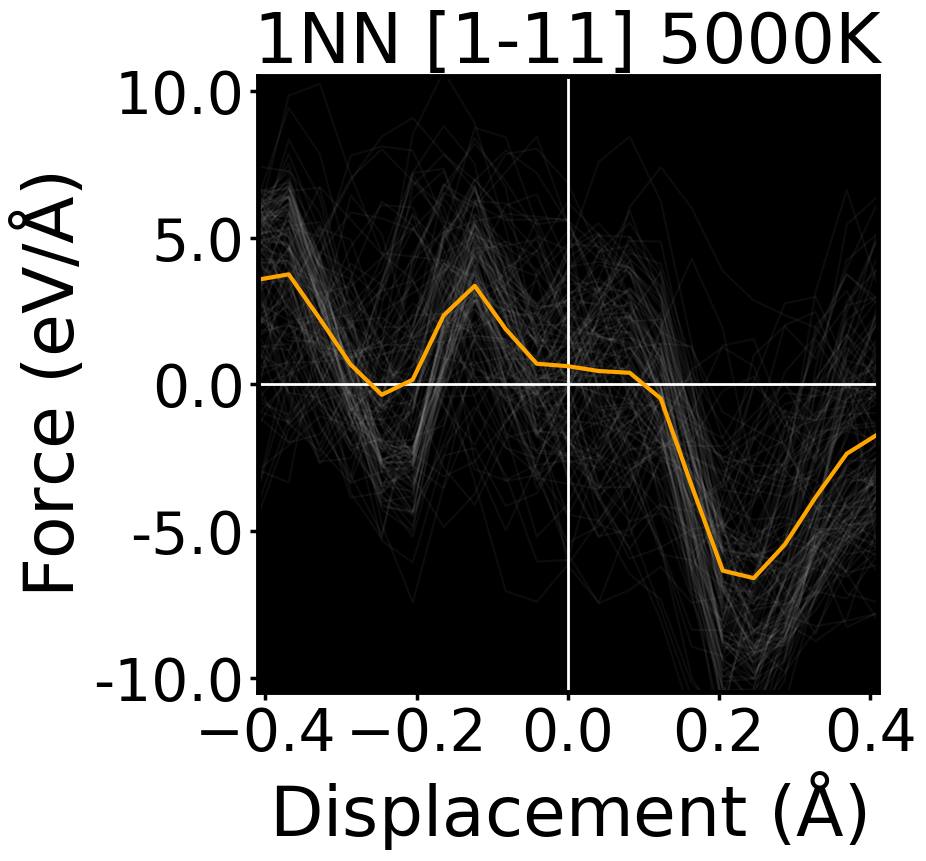

In [9]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('xtick.major', size=6, width=2.5)
plt.rc('ytick.major', size=6, width=2.5)
plt.rc('xtick.minor', size=4, width=1.5)
plt.rc('ytick.minor', size=4, width=1.5)

# Derivative fit for a polynomial
def der(fit, x):
    poly = 0
    for i in range(1, len(fit)):
        poly += i * fit[len(fit) - i - 1] * (x ** (i - 1))
    return poly

np.random.seed(0)
nstep = np.random.choice(range(220))
avg_residue = 0
ts = 20  # Number of steps
max_displacement = 0.41
min_displacement = -0.41
step = (max_displacement - min_displacement) / ts
var = np.linspace(min_displacement - step, max_displacement + step, num=ts + 3)
a_deriv = np.zeros((128, 4, ts + 1))  # Analytical derivative
# Define the directions and format them as strings
# Define the directions as a list of lists

formatted_directions = ['[111]', '[-111]', '[1-11]', '[-1-11]']

#m = [np.array([1, 1, 1]), np.array([-1, 1, 1]), np.array([1,-1,1]), np.array([-1, -1, 1])]

# Select direction and approximation ([-1 -1 1] for 1NN)
selected_direction = 2  # [1 -1 1] corresponds to index 3
#approximation_type = 'Numerical Approx.'

# Create the figure
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_facecolor('black')
ax.axhline(y=0, color='w', linewidth=2)  # Thicker white line
ax.axvline(x=0, color='w', linewidth=2)  # Thicker white line
ax.set_xlim([min_displacement, max_displacement])
ax.set_ylim([-10.5, 10.5])  # Adjusted limits

# Set y-axis ticks with 1 decimal place and bold style
ax.set_yticks([-10.0, -5.0, 0.0, 5.0, 10.0])
ax.set_yticklabels([f"{tick:.1f}" for tick in [-10.0, -5.0, 0.0, 5.0, 10.0]], fontdict={'weight': 'regular'})


# Set x-axis and y-axis tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('regular')
    label.set_fontsize(42)
for label in ax.get_yticklabels():
    label.set_fontweight('regular')
    label.set_fontsize(42)

# Title and labels with increased font weight and size
ax.set_title(f'1NN {formatted_directions[selected_direction]} 5000K', fontsize=50, fontweight='regular')
ax.set_xlabel(r'Displacement ($\mathrm{\AA}$)', fontsize=50, fontweight='regular')
ax.set_ylabel(r'Force (eV/$\mathrm{\AA}$)', fontsize=50, fontweight='regular')

# Make the x and y axis lines (spines) thicker
for spine in ax.spines.values():
    spine.set_linewidth(3.5)  # Further increased thickness to match the title and labels

# Load data
dir = '/content/drive/MyDrive/QE_Fe/PBE/High-pressure/2.49_5000K/'
derivative = np.load(dir + '1_NN_Forces_idlt_' + str(nstep) + '_200.npy')
prediction = np.load(dir + '1_NN_Energies_idlt_' + str(nstep) + '_200.npy')

# Plot the data for the selected direction
avg = np.zeros(ts + 1)
for i in range(128):
    #ax.plot(var[1:ts + 2], -derivative[i, selected_direction, :], '-w', alpha=0.05, linewidth=1.5)  # Increased white line thickness
    #avg -= derivative[i, selected_direction, :]

    y_data = -derivative[i, selected_direction, :ts + 1]  # Slice to match the size of var[1:ts + 2]
    ax.plot(var[1:ts + 2], y_data, '-w', alpha=0.05, linewidth=1.5)  # Plot with adjusted y_data
    avg += y_data

avg /= 128
ax.plot(var[1:ts + 2], avg, color='orange', linestyle='-', linewidth=3)  # Thicker orange line

# Calculate and plot analytical derivatives if required
for i in range(128):
    fit, residuals, _, _, _ = np.polyfit(
        var[1:ts + 2], prediction[(4 * i + selected_direction) * (ts + 3) + 1: (4 * i + selected_direction) * (ts + 3) + ts + 2],
        10, full=True
    )
    avg_residue += residuals[0]
    a_deriv[i, selected_direction, :] = der(fit, var[1:ts + 2])

plt.savefig(dir + '1_NN_Forces_Single.png')
avg_residue /= 128 * 3 * 4
print(f'Average Residue: {avg_residue}')


Average Residue: 0.016140601551052004


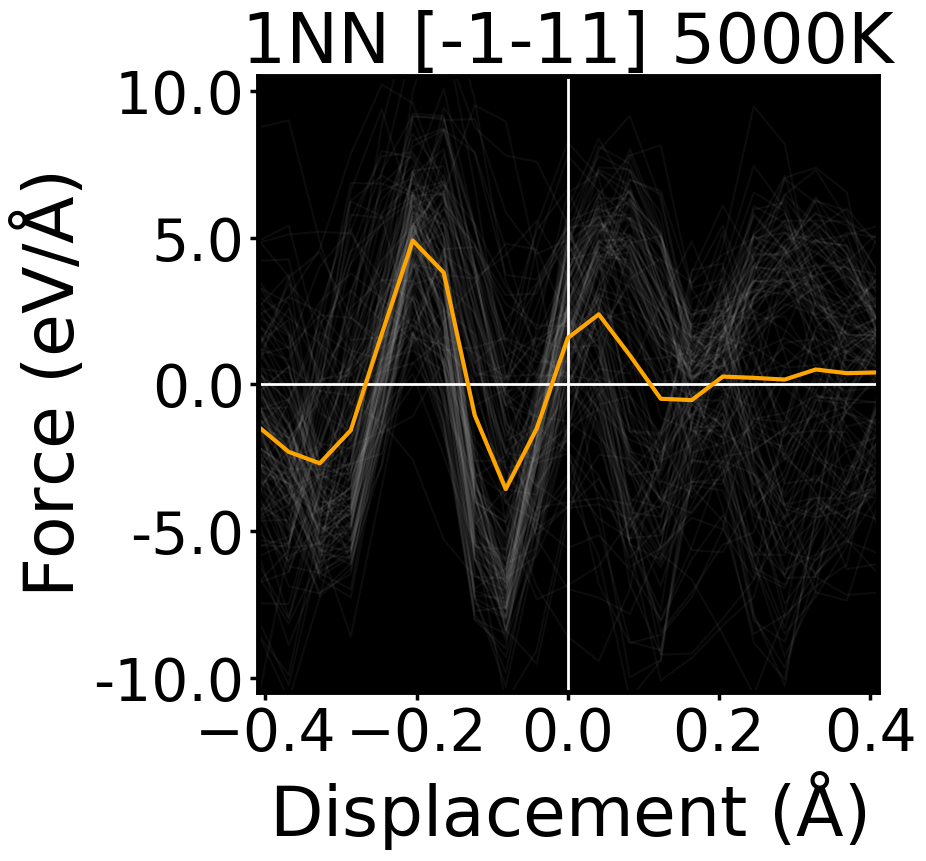

In [10]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('xtick.major', size=6, width=2.5)
plt.rc('ytick.major', size=6, width=2.5)
plt.rc('xtick.minor', size=4, width=1.5)
plt.rc('ytick.minor', size=4, width=1.5)

# Derivative fit for a polynomial
def der(fit, x):
    poly = 0
    for i in range(1, len(fit)):
        poly += i * fit[len(fit) - i - 1] * (x ** (i - 1))
    return poly

np.random.seed(0)
nstep = np.random.choice(range(220))
avg_residue = 0
ts = 20  # Number of steps
max_displacement = 0.41
min_displacement = -0.41
step = (max_displacement - min_displacement) / ts
var = np.linspace(min_displacement - step, max_displacement + step, num=ts + 3)
a_deriv = np.zeros((128, 4, ts + 1))  # Analytical derivative

formatted_directions = ['[111]', '[-111]', '[1-11]', '[-1-11]']

# Select direction and approximation ([-1 -1 1] for 1NN)
selected_direction = 3  # [-1 -1 1] corresponds to index 3
#approximation_type = 'Numerical Approx.'

# Create the figure
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_facecolor('black')
ax.axhline(y=0, color='w', linewidth=2)  # Thicker white line
ax.axvline(x=0, color='w', linewidth=2)  # Thicker white line
ax.set_xlim([min_displacement, max_displacement])
ax.set_ylim([-10.5, 10.5])  # Adjusted limits

# Set y-axis ticks with 1 decimal place and bold style
ax.set_yticks([-10.0, -5.0, 0.0, 5.0, 10.0])
ax.set_yticklabels([f"{tick:.1f}" for tick in [-10.0, -5.0, 0.0, 5.0, 10.0]], fontdict={'weight': 'regular'})


# Set x-axis and y-axis tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('regular')
    label.set_fontsize(42)
for label in ax.get_yticklabels():
    label.set_fontweight('regular')
    label.set_fontsize(42)

# Title and labels with increased font weight and size
ax.set_title(f'1NN {formatted_directions[selected_direction]} 5000K', fontsize=50, fontweight='regular')
ax.set_xlabel(r'Displacement ($\mathrm{\AA}$)', fontsize=50, fontweight='regular')
ax.set_ylabel(r'Force (eV/$\mathrm{\AA}$)', fontsize=50, fontweight='regular')

# Make the x and y axis lines (spines) thicker
for spine in ax.spines.values():
    spine.set_linewidth(3.5)  # Further increased thickness to match the title and labels

# Load data
dir = '/content/drive/MyDrive/QE_Fe/PBE/High-pressure/2.49_5000K/'
derivative = np.load(dir + '1_NN_Forces_idlt_' + str(nstep) + '_200.npy')
prediction = np.load(dir + '1_NN_Energies_idlt_' + str(nstep) + '_200.npy')

# Plot the data for the selected direction
avg = np.zeros(ts + 1)
for i in range(128):
    #ax.plot(var[1:ts + 2], -derivative[i, selected_direction, :], '-w', alpha=0.05, linewidth=1.5)  # Increased white line thickness
    #avg -= derivative[i, selected_direction, :]

    y_data = -derivative[i, selected_direction, :ts + 1]  # Slice to match the size of var[1:ts + 2]
    ax.plot(var[1:ts + 2], y_data, '-w', alpha=0.05, linewidth=1.5)  # Plot with adjusted y_data
    avg += y_data

avg /= 128
ax.plot(var[1:ts + 2], avg, color='orange', linestyle='-', linewidth=3)  # Thicker orange line

# Calculate and plot analytical derivatives if required
for i in range(128):
    fit, residuals, _, _, _ = np.polyfit(
        var[1:ts + 2], prediction[(4 * i + selected_direction) * (ts + 3) + 1: (4 * i + selected_direction) * (ts + 3) + ts + 2],
        10, full=True
    )
    avg_residue += residuals[0]
    a_deriv[i, selected_direction, :] = der(fit, var[1:ts + 2])

plt.savefig(dir + '1_NN_Forces_Single.png')
avg_residue /= 128 * 3 * 4
print(f'Average Residue: {avg_residue}')


In [ ]:
#-a_deriv[0,:,:] Would return derivative values for just the 0th atom
#-a_deriv[:,0,:] Would return derivative values for just the 0th direction
stable_atoms = []
unstable_atoms = []
#Looking at 0th direction
for atom in range(128):
  stable_count = 0
  unstable_count = 0
  for step in range(21):
    if var[step+1]*(-a_deriv[atom,0,step]) <= 0:
      stable_count += 1

    else:
      unstable_count += 1

  if stable_count >= unstable_count:
    stable_atoms.append(atom)

  else:
    unstable_atoms.append(atom)
print(len(stable_atoms))
print(len(unstable_atoms))

128
0


In [ ]:
plt.savefig(dir + '1_NN Forces.png')
avg_residue /= stable_atoms*3*4
print(avg_residue)

[           inf 1.79857714e-04 8.99288568e-05 ... 1.43886171e-06
 1.42744217e-06 1.41620247e-06]


<ipython-input-31-54f2d3f5bd95>:2: RuntimeWarning: divide by zero encountered in divide
  avg_residue /= stable_atoms*3*4


<Figure size 640x480 with 0 Axes>

Average Residue: 0.004901998277168748


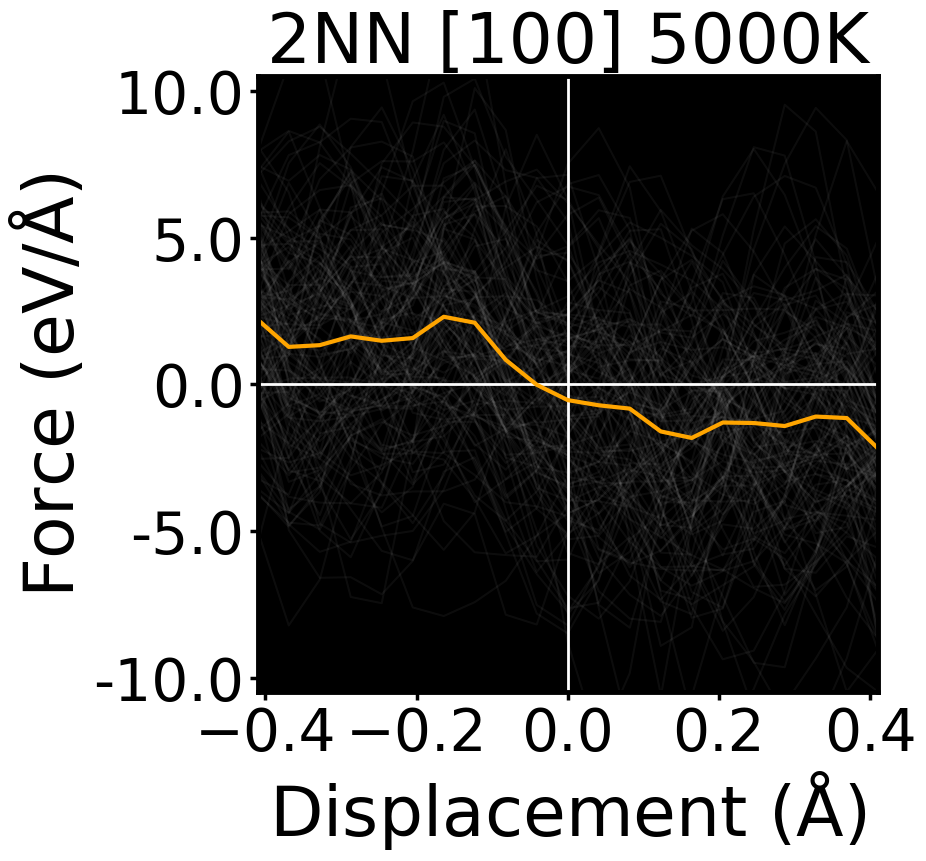

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('xtick.major', size=6, width=2.5)
plt.rc('ytick.major', size=6, width=2.5)
plt.rc('xtick.minor', size=4, width=1.5)
plt.rc('ytick.minor', size=4, width=1.5)

# Derivative fit for a polynomial
def der(fit, x):
    poly = 0
    for i in range(1, len(fit)):
        poly += i * fit[len(fit) - i - 1] * (x ** (i - 1))
    return poly

np.random.seed(0)
nstep = np.random.choice(range(220))
avg_residue = 0
ts = 20  # Number of steps
max_displacement = 0.41
min_displacement = -0.41
step = (max_displacement - min_displacement) / ts
var = np.linspace(min_displacement - step, max_displacement + step, num=ts + 3)
a_deriv = np.zeros((128, 3, ts + 1))  # Analytical derivative


formatted_directions = ['[100]', '[010]', '[001]']
# Select direction and approximation ([1 0 0] for 2NN)
selected_direction = 0  # [1 0 0] corresponds to index 0
#approximation_type = 'Numerical Approx.'

# Create the figure
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_facecolor('black')
ax.axhline(y=0, color='w', linewidth=2)  # Thicker white line
ax.axvline(x=0, color='w', linewidth=2)  # Thicker white line
ax.set_xlim([min_displacement, max_displacement])
ax.set_ylim([-10.5, 10.5])  # Adjusted limits

# Set y-axis ticks with 1 decimal place and bold style
ax.set_yticks([-10.0, -5.0, 0.0, 5.0, 10.0])
ax.set_yticklabels([f"{tick:.1f}" for tick in [-10.0, -5.0, 0.0, 5.0, 10.0]], fontdict={'weight': 'regular'})

# Set x-axis and y-axis tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('regular')
    label.set_fontsize(42)
for label in ax.get_yticklabels():
    label.set_fontweight('regular')
    label.set_fontsize(42)

# Title and labels with increased font weight and size
ax.set_title(f'2NN {formatted_directions[selected_direction]} 5000K', fontsize=50, fontweight='regular')
ax.set_xlabel(r'Displacement ($\mathrm{\AA}$)', fontsize=50, fontweight='regular')
ax.set_ylabel(r'Force (eV/$\mathrm{\AA}$)', fontsize=50, fontweight='regular')

# Make the x and y axis lines (spines) thicker
for spine in ax.spines.values():
    spine.set_linewidth(3.5)  # Further increased thickness to match the title and labels

# Load data
dir = '/content/drive/MyDrive/QE_Fe/PBE/High-pressure/2.49_5000K/'
derivative = np.load(dir + '2_NN_Forces_idlt_' + str(nstep) + '_200.npy')
prediction = np.load(dir + '2_NN_Energies_idlt_' + str(nstep) + '_200.npy')

# Plot the data for the selected direction
avg = np.zeros(ts + 1)
for i in range(128):
    #ax.plot(var[1:ts + 2], -derivative[i, selected_direction, :], '-w', alpha=0.05, linewidth=1.5)  # Increased white line thickness
    #avg -= derivative[i, selected_direction, :]

    y_data = -derivative[i, selected_direction, :ts + 1]  # Slice to match the size of var[1:ts + 2]
    ax.plot(var[1:ts + 2], y_data, '-w', alpha=0.05, linewidth=1.5)  # Plot with adjusted y_data
    avg += y_data

avg /= 128
ax.plot(var[1:ts + 2], avg, color='orange', linestyle='-', linewidth=3)  # Thicker orange line

# Calculate and plot analytical derivatives if required
for i in range(128):
    fit, residuals, _, _, _ = np.polyfit(
        var[1:ts + 2], prediction[(3 * i + selected_direction) * (ts + 3) + 1: (3 * i + selected_direction) * (ts + 3) + ts + 2],
        10, full=True
    )
    avg_residue += residuals[0]
    a_deriv[i, selected_direction, :] = der(fit, var[1:ts + 2])

plt.savefig(dir + '2_NN_Forces_Single.png')
avg_residue /= 128 * 3 * 2
print(f'Average Residue: {avg_residue}')


Average Residue: 0.004429256030435503


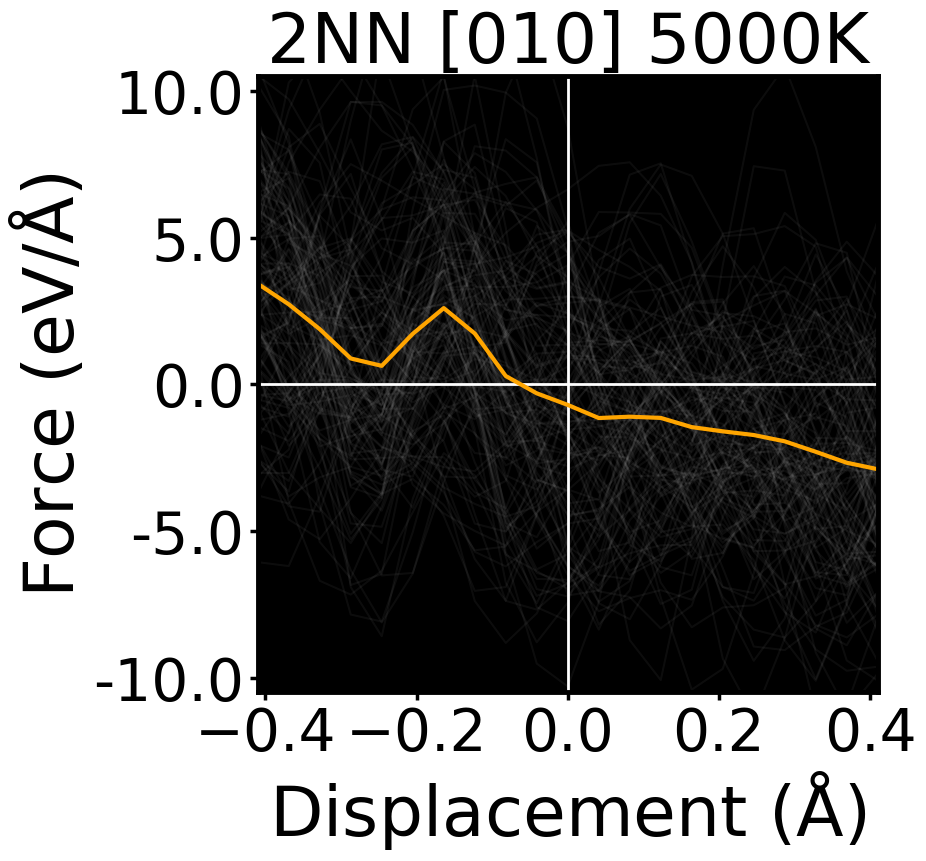

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('xtick.major', size=6, width=2.5)
plt.rc('ytick.major', size=6, width=2.5)
plt.rc('xtick.minor', size=4, width=1.5)
plt.rc('ytick.minor', size=4, width=1.5)

# Derivative fit for a polynomial
def der(fit, x):
    poly = 0
    for i in range(1, len(fit)):
        poly += i * fit[len(fit) - i - 1] * (x ** (i - 1))
    return poly

np.random.seed(0)
nstep = np.random.choice(range(220))
avg_residue = 0
ts = 20  # Number of steps
max_displacement = 0.41
min_displacement = -0.41
step = (max_displacement - min_displacement) / ts
var = np.linspace(min_displacement - step, max_displacement + step, num=ts + 3)
a_deriv = np.zeros((128, 3, ts + 1))  # Analytical derivative
formatted_directions = ['[100]', '[010]', '[001]']


# Select direction and approximation ([0 1 0] for 2NN)
selected_direction = 1  # [0 1 0] corresponds to index 1
#approximation_type = 'Numerical Approx.'

# Create the figure
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_facecolor('black')
ax.axhline(y=0, color='w', linewidth=2)  # Thicker white line
ax.axvline(x=0, color='w', linewidth=2)  # Thicker white line
ax.set_xlim([min_displacement, max_displacement])
ax.set_ylim([-10.5, 10.5])  # Adjusted limits

# Set y-axis ticks with 1 decimal place and bold style
ax.set_yticks([-10.0, -5.0, 0.0, 5.0, 10.0])
ax.set_yticklabels([f"{tick:.1f}" for tick in [-10.0, -5.0, 0.0, 5.0, 10.0]], fontdict={'weight': 'regular'})


# Set x-axis and y-axis tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('regular')
    label.set_fontsize(42)
for label in ax.get_yticklabels():
    label.set_fontweight('regular')
    label.set_fontsize(42)

# Title and labels with increased font weight and size
ax.set_title(f'2NN {formatted_directions[selected_direction]} 5000K', fontsize=50, fontweight='regular')
ax.set_xlabel(r'Displacement ($\mathrm{\AA}$)', fontsize=50, fontweight='regular')
ax.set_ylabel(r'Force (eV/$\mathrm{\AA}$)', fontsize=50, fontweight='regular')

# Make the x and y axis lines (spines) thicker
for spine in ax.spines.values():
    spine.set_linewidth(3.5)  # Further increased thickness to match the title and labels

# Load data
dir = '/content/drive/MyDrive/QE_Fe/PBE/High-pressure/2.49_5000K/'
derivative = np.load(dir + '2_NN_Forces_idlt_' + str(nstep) + '_200.npy')
prediction = np.load(dir + '2_NN_Energies_idlt_' + str(nstep) + '_200.npy')

# Plot the data for the selected direction
avg = np.zeros(ts + 1)
for i in range(128):
    #ax.plot(var[1:ts + 2], -derivative[i, selected_direction, :], '-w', alpha=0.05, linewidth=1.5)  # Increased white line thickness
    #avg -= derivative[i, selected_direction, :]

    y_data = -derivative[i, selected_direction, :ts + 1]  # Slice to match the size of var[1:ts + 2]
    ax.plot(var[1:ts + 2], y_data, '-w', alpha=0.05, linewidth=1.5)  # Plot with adjusted y_data
    avg += y_data

avg /= 128
ax.plot(var[1:ts + 2], avg, color='orange', linestyle='-', linewidth=3)  # Thicker orange line

# Calculate and plot analytical derivatives if required
for i in range(128):
    fit, residuals, _, _, _ = np.polyfit(
        var[1:ts + 2], prediction[(3 * i + selected_direction) * (ts + 3) + 1: (3 * i + selected_direction) * (ts + 3) + ts + 2],
        10, full=True
    )
    avg_residue += residuals[0]
    a_deriv[i, selected_direction, :] = der(fit, var[1:ts + 2])

plt.savefig(dir + '2_NN_Forces_Single.png')
avg_residue /= 128 * 3 * 2
print(f'Average Residue: {avg_residue}')


Average Residue: 0.004931776310356329


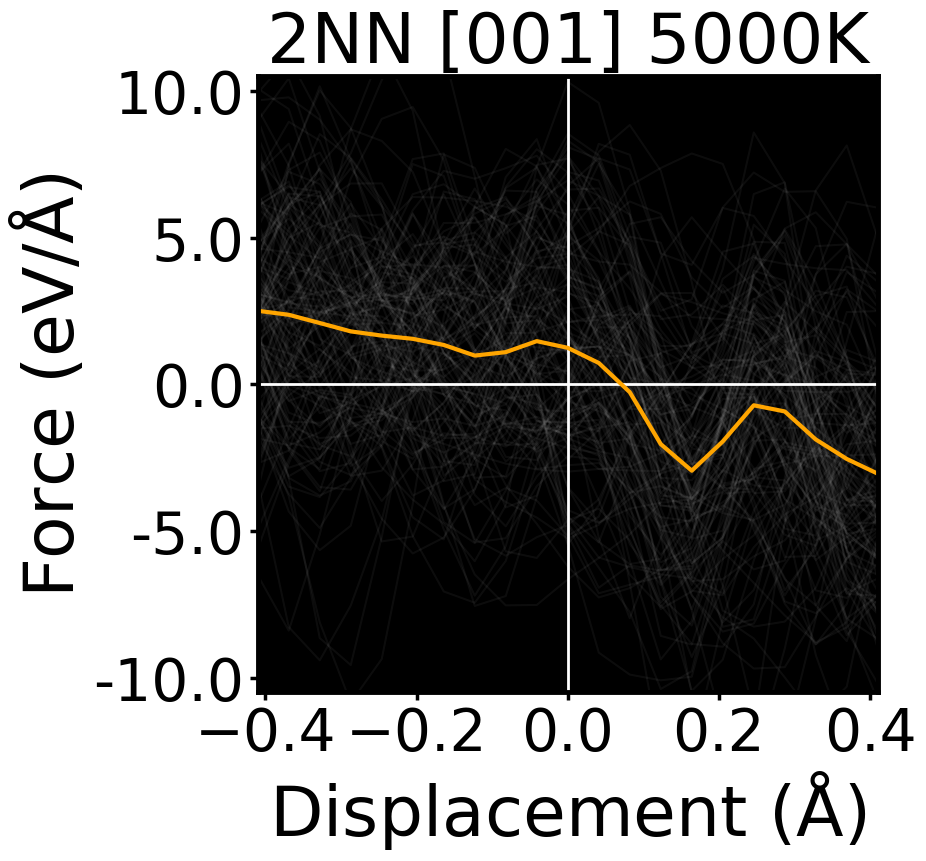

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('xtick.major', size=6, width=2.5)
plt.rc('ytick.major', size=6, width=2.5)
plt.rc('xtick.minor', size=4, width=1.5)
plt.rc('ytick.minor', size=4, width=1.5)

# Derivative fit for a polynomial
def der(fit, x):
    poly = 0
    for i in range(1, len(fit)):
        poly += i * fit[len(fit) - i - 1] * (x ** (i - 1))
    return poly

np.random.seed(0)
nstep = np.random.choice(range(220))
avg_residue = 0
ts = 20  # Number of steps
max_displacement = 0.41
min_displacement = -0.41
step = (max_displacement - min_displacement) / ts
var = np.linspace(min_displacement - step, max_displacement + step, num=ts + 3)
a_deriv = np.zeros((128, 3, ts + 1))  # Analytical derivative

formatted_directions = ['[100]', '[010]', '[001]']


# Select direction and approximation ([0 0 1] for 2NN)
selected_direction = 2  # [0 0 1] corresponds to index 2
#approximation_type = 'Numerical Approx.'

# Create the figure
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_facecolor('black')
ax.axhline(y=0, color='w', linewidth=2)  # Thicker white line
ax.axvline(x=0, color='w', linewidth=2)  # Thicker white line
ax.set_xlim([min_displacement, max_displacement])
ax.set_ylim([-10.5, 10.5])  # Adjusted limits

# Set y-axis ticks with 1 decimal place and bold style
ax.set_yticks([-10.0, -5.0, 0.0, 5.0, 10.0])
ax.set_yticklabels([f"{tick:.1f}" for tick in [-10.0, -5.0, 0.0, 5.0, 10.0]], fontdict={'weight': 'regular'})


# Set x-axis and y-axis tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('regular')
    label.set_fontsize(42)
for label in ax.get_yticklabels():
    label.set_fontweight('regular')
    label.set_fontsize(42)

# Title and labels with increased font weight and size
ax.set_title(f'2NN {formatted_directions[selected_direction]} 5000K', fontsize=50, fontweight='regular')
ax.set_xlabel(r'Displacement ($\mathrm{\AA}$)', fontsize=50, fontweight='regular')
ax.set_ylabel(r'Force (eV/$\mathrm{\AA}$)', fontsize=50, fontweight='regular')

# Make the x and y axis lines (spines) thicker
for spine in ax.spines.values():
    spine.set_linewidth(3.5)  # Further increased thickness to match the title and labels

# Load data
dir = '/content/drive/MyDrive/QE_Fe/PBE/High-pressure/2.49_5000K/'
derivative = np.load(dir + '2_NN_Forces_idlt_' + str(nstep) + '_200.npy')
prediction = np.load(dir + '2_NN_Energies_idlt_' + str(nstep) + '_200.npy')

# Plot the data for the selected direction
avg = np.zeros(ts + 1)
for i in range(128):
    #ax.plot(var[1:ts + 2], -derivative[i, selected_direction, :], '-w', alpha=0.05, linewidth=1.5)  # Increased white line thickness
    #avg -= derivative[i, selected_direction, :]

    y_data = -derivative[i, selected_direction, :ts + 1]  # Slice to match the size of var[1:ts + 2]
    ax.plot(var[1:ts + 2], y_data, '-w', alpha=0.05, linewidth=1.5)  # Plot with adjusted y_data
    avg += y_data

avg /= 128
ax.plot(var[1:ts + 2], avg, color='orange', linestyle='-', linewidth=3)  # Thicker orange line

# Calculate and plot analytical derivatives if required
for i in range(128):
    fit, residuals, _, _, _ = np.polyfit(
        var[1:ts + 2], prediction[(3 * i + selected_direction) * (ts + 3) + 1: (3 * i + selected_direction) * (ts + 3) + ts + 2],
        10, full=True
    )
    avg_residue += residuals[0]
    a_deriv[i, selected_direction, :] = der(fit, var[1:ts + 2])

plt.savefig(dir + '2_NN_Forces_Single.png')
avg_residue /= 128 * 3 * 2
print(f'Average Residue: {avg_residue}')


Average Residue: 0.08256099921567069


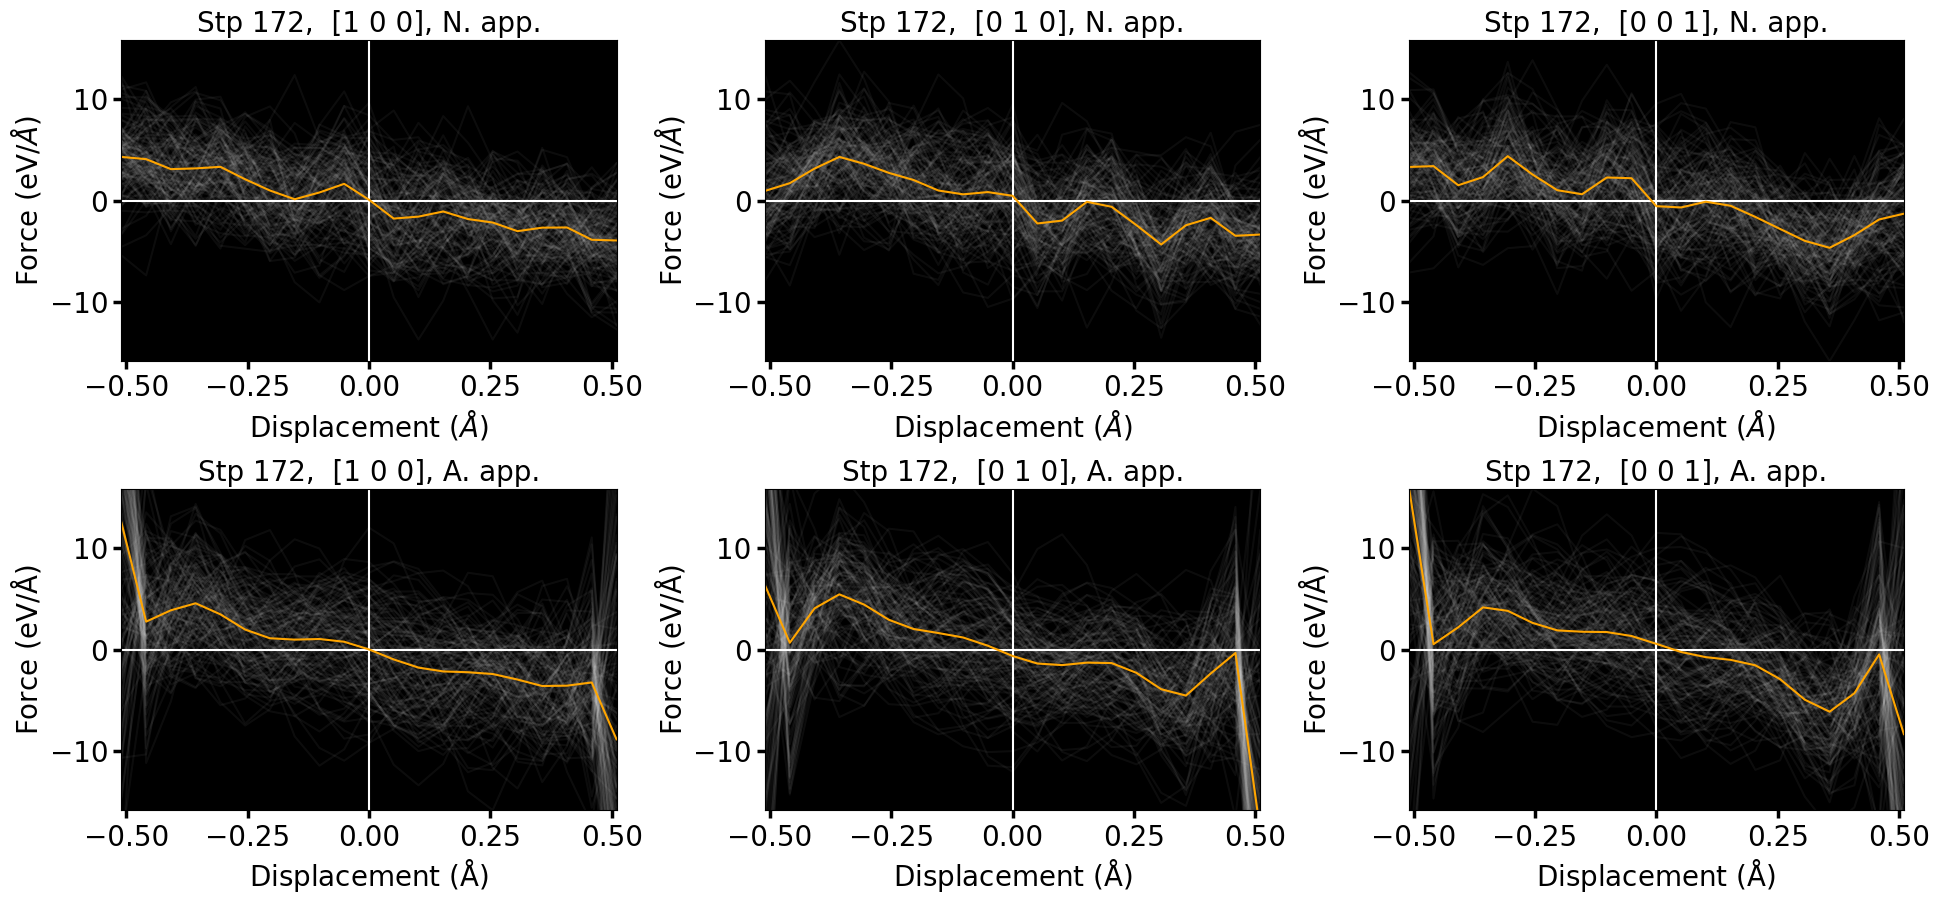

In [ ]:
"""
import numpy as np
import matplotlib.pyplot as plt

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('xtick.major', size=6, width=2.5)
plt.rc('ytick.major', size=6, width=2.5)
plt.rc('xtick.minor', size=4, width=1.5)
plt.rc('ytick.minor', size=4, width=1.5)

# Derivative fit for a polynomial
def der(fit, x):
    poly = 0
    for i in range(1, len(fit)):
        poly += i * fit[len(fit) - i - 1] * (x ** (i - 1))
    return poly

np.random.seed(0)
nstep = np.random.choice(range(220))
avg_residue = 0
ts = 20  # Number of steps
max_displacement = 0.51
min_displacement = -0.51
step = (max_displacement - min_displacement) / ts
var = np.linspace(min_displacement - step, max_displacement + step, num=ts + 3)
a_deriv = np.zeros((128, 3, ts + 1))  # Analytical derivative

# Axes of interest for 2NN
m = [np.array([1, 0, 0]), np.array([0, 1, 0]), np.array([0, 0, 1])]
p = 0  # Counter to iterate through plot grid

# Create the figure with adjusted layout
fig, ax = plt.subplots(2, 3, figsize=(23, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Increase space between plots

# Load data
dir = '/content/drive/MyDrive/QE_Fe/PBE/High-pressure/2.36_5000K/'
derivative = np.load(dir + '2NN_Forces_idlt_' + str(nstep) + '_220.npy')
miny = np.min(-derivative[:, :, :])
maxy = np.max(-derivative[:, :, :])

for nstep in [nstep]:  # Iterate through time steps of interest
    derivative = np.load(dir + '2NN_Forces_idlt_' + str(nstep) + '_220.npy')
    prediction = np.load(dir + '2NN_Energies_idlt_' + str(nstep) + '_220.npy')

    for d in range(3):  # Iterate over the 3 axes
        ax[2 * p, d].set_facecolor('black')
        ax[2 * p, d].axhline(y=0, color='w')
        ax[2 * p, d].axvline(x=0, color='w')
        ax[2 * p, d].set_xlim([min_displacement, max_displacement])
        ax[2 * p, d].set_ylim([miny, maxy])

        # Set title and labels
        ax[2 * p, d].set_title(f'Stp {nstep},  {m[d]}, N. app.', fontsize=20)
        ax[2 * p, d].set_xlabel(r'Displacement ($\AA$)',fontsize=20)
        ax[2 * p, d].set_ylabel(r'Force (eV/$\AA$)',fontsize=20)

        avg = np.zeros(ts + 1)  # Average curve of the Force
        for i in range(128):
            ax[2 * p, d].plot(var[1:ts + 2], -derivative[i, d, :], '-w', alpha=0.05)
            avg -= derivative[i, d, :]

        avg /= 128
        ax[2 * p, d].plot(var[1:ts + 2], avg, color='orange', linestyle='-')  # Orange line

        for i in range(128):
            fit, residuals, _, _, _ = np.polyfit(
                var[1:ts + 2], prediction[(3 * i + d) * (ts + 3) + 1: (3 * i + d) * (ts + 3) + ts + 2],
                10, full=True
            )
            avg_residue += residuals[0]
            a_deriv[i, d, :] = der(fit, var[1:ts + 2])

        ax[2 * p + 1, d].set_facecolor('black')
        ax[2 * p + 1, d].axhline(y=0, color='w')
        ax[2 * p + 1, d].axvline(x=0, color='w')
        ax[2 * p + 1, d].set_xlim([min_displacement, max_displacement])
        ax[2 * p + 1, d].set_ylim([miny, maxy])

        # Set title and labels
        ax[2 * p + 1, d].set_title(f'Stp {nstep},  {m[d]}, A. app.', fontsize=20)
        ax[2 * p + 1, d].set_xlabel(r'Displacement ($\mathrm{\AA}$)',fontsize=20)
        ax[2 * p + 1, d].set_ylabel(r'Force (eV/$\mathrm{\AA}$)',fontsize=20)

        avg = np.zeros(ts + 1)  # Average curve of the Force
        for i in range(128):
            ax[2 * p + 1, d].plot(var[1:ts + 2], -a_deriv[i, d, :], '-w', alpha=0.05)
            avg -= a_deriv[i, d, :]

        avg /= 128
        ax[2 * p + 1, d].plot(var[1:ts + 2], avg, color='orange', linestyle='-')  # Orange line

    p += 1

plt.savefig(dir + '2NN_Forces_Updated.png')
avg_residue /= 128 * 3 * 3
print(f'Average Residue: {avg_residue}')

"""

Average Residue: 0.006169091904707786


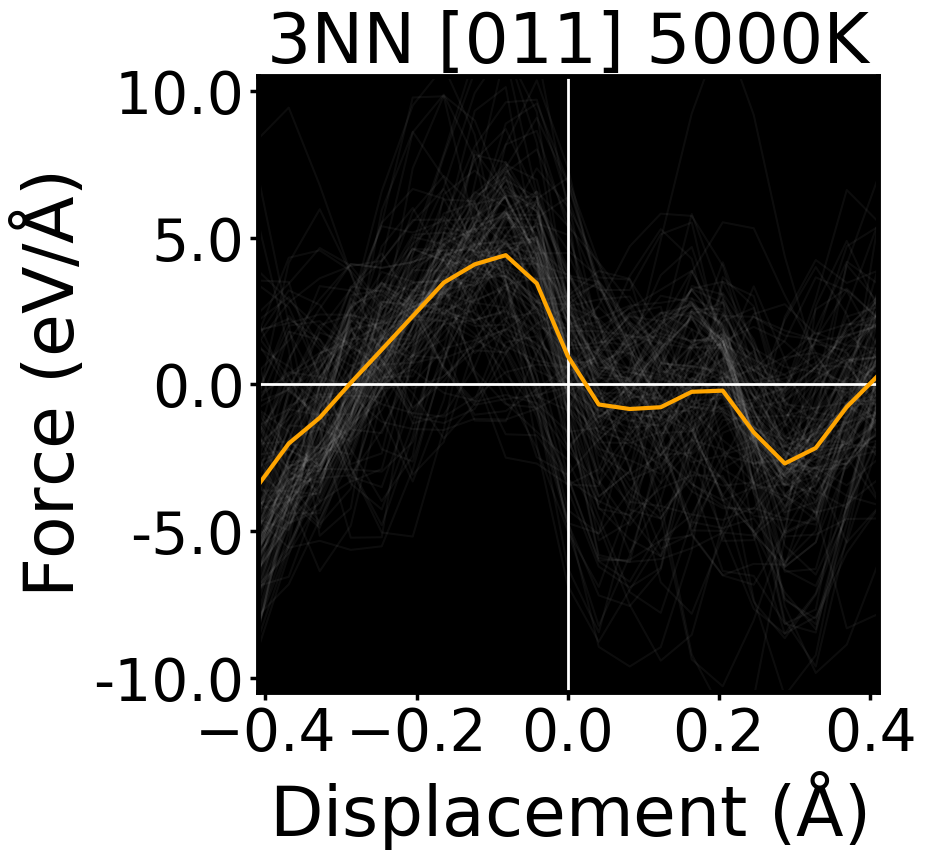

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('xtick.major', size=6, width=2.5)
plt.rc('ytick.major', size=6, width=2.5)
plt.rc('xtick.minor', size=4, width=1.5)
plt.rc('ytick.minor', size=4, width=1.5)

# Derivative fit for a polynomial
def der(fit, x):
    poly = 0
    for i in range(1, len(fit)):
        poly += i * fit[len(fit) - i - 1] * (x ** (i - 1))
    return poly

np.random.seed(0)
nstep = np.random.choice(range(220))
avg_residue = 0
ts = 20  # Number of steps
max_displacement = 0.41
min_displacement = -0.41
step = (max_displacement - min_displacement) / ts
var = np.linspace(min_displacement - step, max_displacement + step, num=ts + 3)
a_deriv = np.zeros((128, 6, ts + 1))  # Analytical derivative


formatted_directions = ['[011]', '[0-11]', '[101]','[-101]','[110]','[-110]']
# Select direction and approximation ([0 1 1] for 3NN)
selected_direction = 0  # [0 1 1] corresponds to index 0
#approximation_type = 'Numerical Approx.'

# Create the figure
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_facecolor('black')
ax.axhline(y=0, color='w', linewidth=2)  # Thicker white line
ax.axvline(x=0, color='w', linewidth=2)  # Thicker white line
ax.set_xlim([min_displacement, max_displacement])
ax.set_ylim([-10.5, 10.5])  # Adjusted limits

# Set y-axis ticks with 1 decimal place and bold style
ax.set_yticks([-10.0, -5.0, 0.0, 5.0, 10.0])
ax.set_yticklabels([f"{tick:.1f}" for tick in [-10.0, -5.0, 0.0, 5.0, 10.0]], fontdict={'weight': 'regular'})

# Set x-axis tick label to bold
for label in ax.get_xticklabels():
    label.set_fontweight('regular')
    label.set_fontsize(42)
for label in ax.get_yticklabels():
    label.set_fontweight('regular')
    label.set_fontsize(42)

# Title and labels with increased font weight and size
ax.set_title(f'3NN {formatted_directions[selected_direction]} 5000K', fontsize=50, fontweight='regular')
ax.set_xlabel(r'Displacement ($\mathrm{\AA}$)', fontsize=50, fontweight='regular')
ax.set_ylabel(r'Force (eV/$\mathrm{\AA}$)', fontsize=50, fontweight='regular')

# Make the x and y axis lines (spines) thicker
for spine in ax.spines.values():
    spine.set_linewidth(3.5)  # Further increased thickness to match the title and labels

# Load data
dir = '/content/drive/MyDrive/QE_Fe/PBE/High-pressure/2.49_5000K/'
derivative = np.load(dir + '3_NN_Forces_idlt_' + str(nstep) + '_200.npy')
prediction = np.load(dir + '3_NN_Energies_idlt_' + str(nstep) + '_200.npy')

# Plot the data for the selected direction
avg = np.zeros(ts + 1)
for i in range(128):
    #ax.plot(var[1:ts + 2], -derivative[i, selected_direction, :], '-w', alpha=0.05, linewidth=1.5)  # Increased white line thickness
    #avg -= derivative[i, selected_direction, :]

    y_data = -derivative[i, selected_direction, :ts + 1]  # Slice to match the size of var[1:ts + 2]
    ax.plot(var[1:ts + 2], y_data, '-w', alpha=0.05, linewidth=1.5)  # Plot with adjusted y_data
    avg += y_data

avg /= 128
ax.plot(var[1:ts + 2], avg, color='orange', linestyle='-', linewidth=3)  # Thicker orange line

# Calculate and plot analytical derivatives if required
for i in range(128):
    fit, residuals, _, _, _ = np.polyfit(
        var[1:ts + 2], prediction[(6 * i + selected_direction) * (ts + 3) + 1: (6 * i + selected_direction) * (ts + 3) + ts + 2],
        10, full=True
    )
    avg_residue += residuals[0]
    a_deriv[i, selected_direction, :] = der(fit, var[1:ts + 2])

plt.savefig(dir + '3_NN_Forces_Single.png')
avg_residue /= 128 * 3 * 2
print(f'Average Residue: {avg_residue}')


Average Residue: 0.00887201536329435


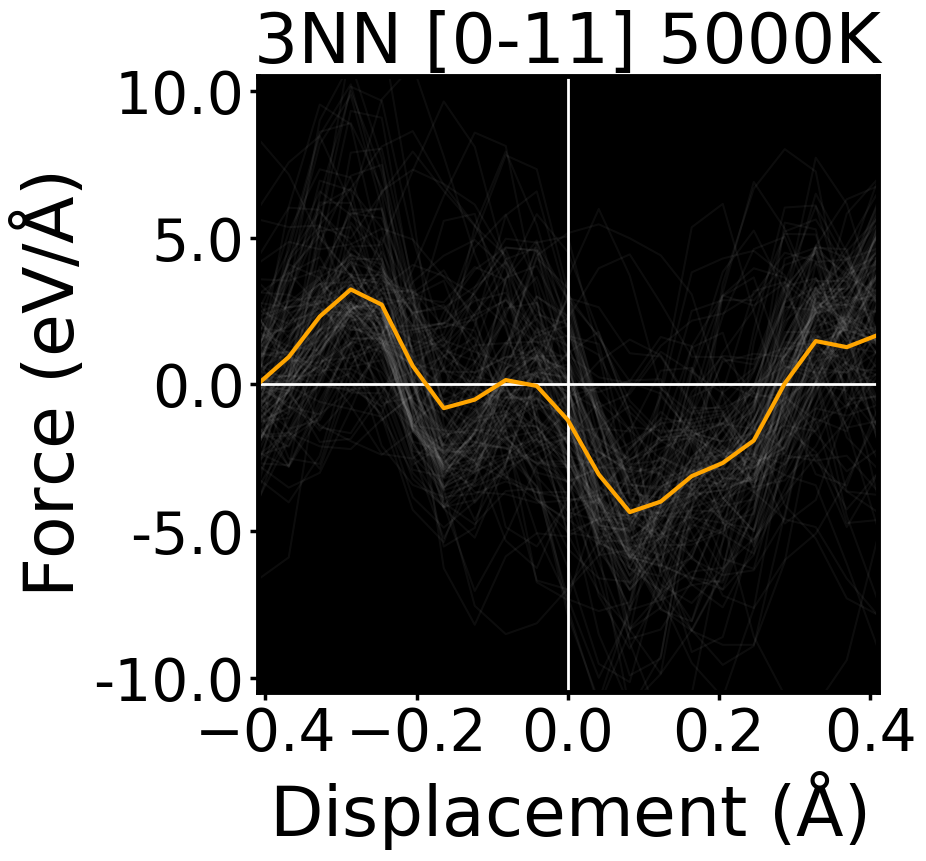

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('xtick.major', size=6, width=2.5)
plt.rc('ytick.major', size=6, width=2.5)
plt.rc('xtick.minor', size=4, width=1.5)
plt.rc('ytick.minor', size=4, width=1.5)

# Derivative fit for a polynomial
def der(fit, x):
    poly = 0
    for i in range(1, len(fit)):
        poly += i * fit[len(fit) - i - 1] * (x ** (i - 1))
    return poly

np.random.seed(0)
nstep = np.random.choice(range(220))
avg_residue = 0
ts = 20  # Number of steps
max_displacement = 0.41
min_displacement = -0.41
step = (max_displacement - min_displacement) / ts
var = np.linspace(min_displacement - step, max_displacement + step, num=ts + 3)
a_deriv = np.zeros((128, 6, ts + 1))  # Analytical derivative
formatted_directions = ['[011]', '[0-11]', '[101]','[-101]','[110]','[-110]']

# Select direction and approximation ([0 -1 1] for 3NN)
selected_direction = 1  # [0 -1 1] corresponds to index 1
#approximation_type = 'Numerical Approx.'

# Create the figure
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_facecolor('black')
ax.axhline(y=0, color='w', linewidth=2)  # Thicker white line
ax.axvline(x=0, color='w', linewidth=2)  # Thicker white line
ax.set_xlim([min_displacement, max_displacement])
ax.set_ylim([-10.5, 10.5])  # Adjusted limits

# Set y-axis ticks with 1 decimal place and bold style
ax.set_yticks([-10.0, -5.0, 0.0, 5.0, 10.0])
ax.set_yticklabels([f"{tick:.1f}" for tick in [-10.0, -5.0, 0.0, 5.0, 10.0]], fontdict={'weight': 'regular'})


# Set x-axis and y-axis tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('regular')
    label.set_fontsize(42)
for label in ax.get_yticklabels():
    label.set_fontweight('regular')
    label.set_fontsize(42)

# Title and labels with increased font weight and size
ax.set_title(f'3NN {formatted_directions[selected_direction]} 5000K', fontsize=50, fontweight='regular')
ax.set_xlabel(r'Displacement ($\mathrm{\AA}$)', fontsize=50, fontweight='regular')
ax.set_ylabel(r'Force (eV/$\mathrm{\AA}$)', fontsize=50, fontweight='regular')

# Make the x and y axis lines (spines) thicker
for spine in ax.spines.values():
    spine.set_linewidth(3.5)  # Further increased thickness to match the title and labels

# Load data
dir = '/content/drive/MyDrive/QE_Fe/PBE/High-pressure/2.49_5000K/'
derivative = np.load(dir + '3_NN_Forces_idlt_' + str(nstep) + '_200.npy')
prediction = np.load(dir + '3_NN_Energies_idlt_' + str(nstep) + '_200.npy')

# Plot the data for the selected direction
avg = np.zeros(ts + 1)
for i in range(128):
    #ax.plot(var[1:ts + 2], -derivative[i, selected_direction, :], '-w', alpha=0.05, linewidth=1.5)  # Increased white line thickness
    #avg -= derivative[i, selected_direction, :]

    y_data = -derivative[i, selected_direction, :ts + 1]  # Slice to match the size of var[1:ts + 2]
    ax.plot(var[1:ts + 2], y_data, '-w', alpha=0.05, linewidth=1.5)  # Plot with adjusted y_data
    avg += y_data

avg /= 128
ax.plot(var[1:ts + 2], avg, color='orange', linestyle='-', linewidth=3)  # Thicker orange line

# Calculate and plot analytical derivatives if required
for i in range(128):
    fit, residuals, _, _, _ = np.polyfit(
        var[1:ts + 2], prediction[(6 * i + selected_direction) * (ts + 3) + 1: (6 * i + selected_direction) * (ts + 3) + ts + 2],
        10, full=True
    )
    avg_residue += residuals[0]
    a_deriv[i, selected_direction, :] = der(fit, var[1:ts + 2])

plt.savefig(dir + '3_NN_Forces_Single.png')
avg_residue /= 128 * 3 * 2
print(f'Average Residue: {avg_residue}')


Average Residue: 0.009223428419158474


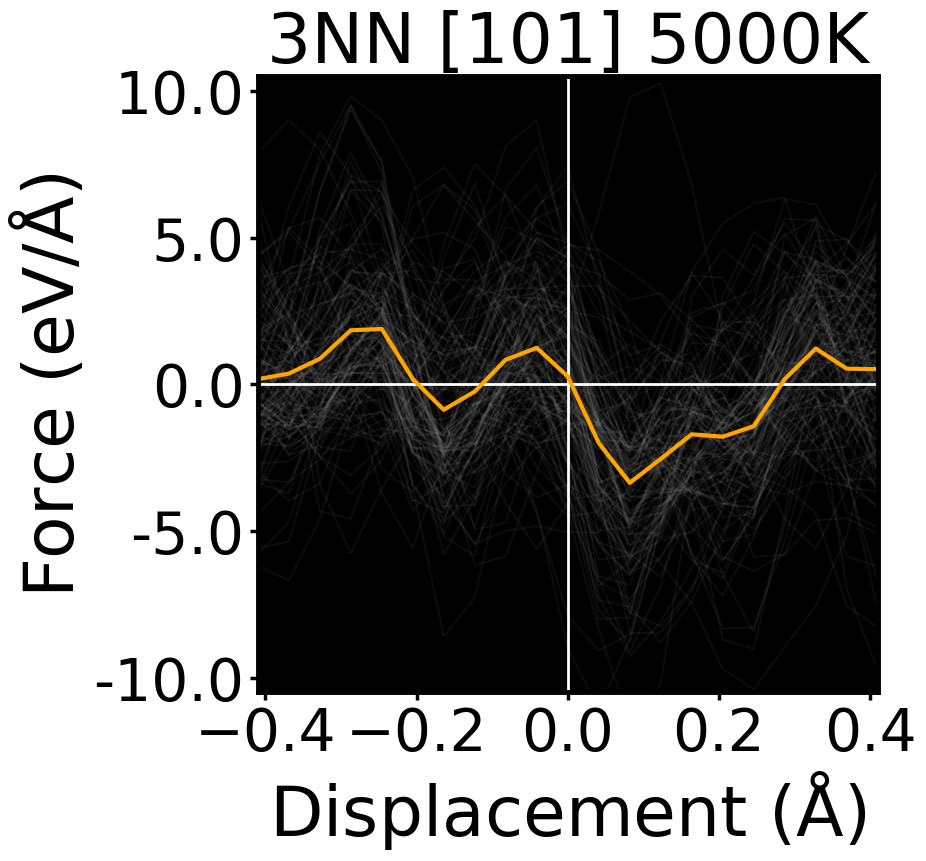

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('xtick.major', size=6, width=2.5)
plt.rc('ytick.major', size=6, width=2.5)
plt.rc('xtick.minor', size=4, width=1.5)
plt.rc('ytick.minor', size=4, width=1.5)

# Derivative fit for a polynomial
def der(fit, x):
    poly = 0
    for i in range(1, len(fit)):
        poly += i * fit[len(fit) - i - 1] * (x ** (i - 1))
    return poly

np.random.seed(0)
nstep = np.random.choice(range(220))
avg_residue = 0
ts = 20  # Number of steps
max_displacement = 0.41
min_displacement = -0.41
step = (max_displacement - min_displacement) / ts
var = np.linspace(min_displacement - step, max_displacement + step, num=ts + 3)
a_deriv = np.zeros((128, 6, ts + 1))  # Analytical derivative
formatted_directions = ['[011]', '[0-11]', '[101]','[-101]','[110]','[-110]']

# Select direction and approximation ([1 0 1] for 3NN)
selected_direction = 2  # [1 0 1] corresponds to index 2
#approximation_type = 'Numerical Approx.'

# Create the figure
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_facecolor('black')
ax.axhline(y=0, color='w', linewidth=2)  # Thicker white line
ax.axvline(x=0, color='w', linewidth=2)  # Thicker white line
ax.set_xlim([min_displacement, max_displacement])
ax.set_ylim([-10.5, 10.5])  # Adjusted limits

# Set y-axis ticks with 1 decimal place and bold style
ax.set_yticks([-10.0, -5.0, 0.0, 5.0, 10.0])
ax.set_yticklabels([f"{tick:.1f}" for tick in [-10.0, -5.0, 0.0, 5.0, 10.0]], fontdict={'weight': 'regular'})


# Set x-axis and y-axis tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('regular')
    label.set_fontsize(42)
for label in ax.get_yticklabels():
    label.set_fontweight('regular')
    label.set_fontsize(42)

# Title and labels with increased font weight and size
ax.set_title(f'3NN {formatted_directions[selected_direction]} 5000K', fontsize=50, fontweight='regular')
ax.set_xlabel(r'Displacement ($\mathrm{\AA}$)', fontsize=50, fontweight='regular')
ax.set_ylabel(r'Force (eV/$\mathrm{\AA}$)', fontsize=50, fontweight='regular')

# Make the x and y axis lines (spines) thicker
for spine in ax.spines.values():
    spine.set_linewidth(3.5)  # Further increased thickness to match the title and labels

# Load data
dir = '/content/drive/MyDrive/QE_Fe/PBE/High-pressure/2.49_5000K/'
derivative = np.load(dir + '3_NN_Forces_idlt_' + str(nstep) + '_200.npy')
prediction = np.load(dir + '3_NN_Energies_idlt_' + str(nstep) + '_200.npy')

# Plot the data for the selected direction
avg = np.zeros(ts + 1)
for i in range(128):
    #ax.plot(var[1:ts + 2], -derivative[i, selected_direction, :], '-w', alpha=0.05, linewidth=1.5)  # Increased white line thickness
    #avg -= derivative[i, selected_direction, :]

    y_data = -derivative[i, selected_direction, :ts + 1]  # Slice to match the size of var[1:ts + 2]
    ax.plot(var[1:ts + 2], y_data, '-w', alpha=0.05, linewidth=1.5)  # Plot with adjusted y_data
    avg += y_data

avg /= 128
ax.plot(var[1:ts + 2], avg, color='orange', linestyle='-', linewidth=3)  # Thicker orange line

# Calculate and plot analytical derivatives if required
for i in range(128):
    fit, residuals, _, _, _ = np.polyfit(
        var[1:ts + 2], prediction[(6 * i + selected_direction) * (ts + 3) + 1: (6 * i + selected_direction) * (ts + 3) + ts + 2],
        10, full=True
    )
    avg_residue += residuals[0]
    a_deriv[i, selected_direction, :] = der(fit, var[1:ts + 2])

plt.savefig(dir + '3_NN_Forces_Single.png')
avg_residue /= 128 * 3 * 2
print(f'Average Residue: {avg_residue}')


Average Residue: 0.007086526421890026


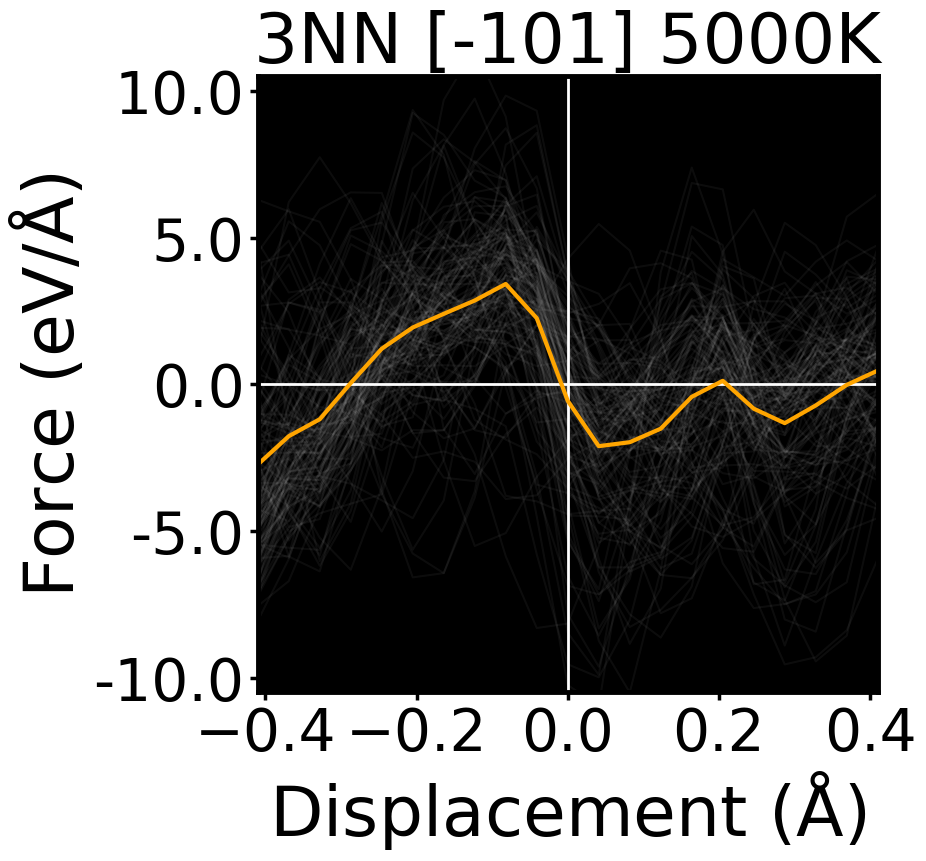

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('xtick.major', size=6, width=2.5)
plt.rc('ytick.major', size=6, width=2.5)
plt.rc('xtick.minor', size=4, width=1.5)
plt.rc('ytick.minor', size=4, width=1.5)

# Derivative fit for a polynomial
def der(fit, x):
    poly = 0
    for i in range(1, len(fit)):
        poly += i * fit[len(fit) - i - 1] * (x ** (i - 1))
    return poly

np.random.seed(0)
nstep = np.random.choice(range(220))
avg_residue = 0
ts = 20  # Number of steps
max_displacement = 0.41
min_displacement = -0.41
step = (max_displacement - min_displacement) / ts
var = np.linspace(min_displacement - step, max_displacement + step, num=ts + 3)
a_deriv = np.zeros((128, 6, ts + 1))  # Analytical derivative

formatted_directions = ['[011]', '[0-11]', '[101]','[-101]','[110]','[-110]']

# Select direction and approximation ([-1 0 1] for 3NN)
selected_direction = 3  # [-1 0 1] corresponds to index 3
#approximation_type = 'Numerical Approx.'

# Create the figure
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_facecolor('black')
ax.axhline(y=0, color='w', linewidth=2)  # Thicker white line
ax.axvline(x=0, color='w', linewidth=2)  # Thicker white line
ax.set_xlim([min_displacement, max_displacement])
ax.set_ylim([-10.5, 10.5])  # Adjusted limits

# Set y-axis ticks with 1 decimal place and bold style
ax.set_yticks([-10.0, -5.0, 0.0, 5.0, 10.0])
ax.set_yticklabels([f"{tick:.1f}" for tick in [-10.0, -5.0, 0.0, 5.0, 10.0]], fontdict={'weight': 'regular'})

# Set x-axis and y-axis tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('regular')
    label.set_fontsize(42)
for label in ax.get_yticklabels():
    label.set_fontweight('regular')
    label.set_fontsize(42)

# Title and labels with increased font weight and size
ax.set_title(f'3NN {formatted_directions[selected_direction]} 5000K', fontsize=50, fontweight='regular')
ax.set_xlabel(r'Displacement ($\mathrm{\AA}$)', fontsize=50, fontweight='regular')
ax.set_ylabel(r'Force (eV/$\mathrm{\AA}$)', fontsize=50, fontweight='regular')

# Make the x and y axis lines (spines) thicker
for spine in ax.spines.values():
    spine.set_linewidth(3.5)  # Further increased thickness to match the title and labels

# Load data
dir = '/content/drive/MyDrive/QE_Fe/PBE/High-pressure/2.49_5000K/'
derivative = np.load(dir + '3_NN_Forces_idlt_' + str(nstep) + '_200.npy')
prediction = np.load(dir + '3_NN_Energies_idlt_' + str(nstep) + '_200.npy')

# Plot the data for the selected direction
avg = np.zeros(ts + 1)
for i in range(128):
    #ax.plot(var[1:ts + 2], -derivative[i, selected_direction, :], '-w', alpha=0.05, linewidth=1.5)  # Increased white line thickness
    #avg -= derivative[i, selected_direction, :]

    y_data = -derivative[i, selected_direction, :ts + 1]  # Slice to match the size of var[1:ts + 2]
    ax.plot(var[1:ts + 2], y_data, '-w', alpha=0.05, linewidth=1.5)  # Plot with adjusted y_data
    avg += y_data

avg /= 128
ax.plot(var[1:ts + 2], avg, color='orange', linestyle='-', linewidth=3)  # Thicker orange line

# Calculate and plot analytical derivatives if required
for i in range(128):
    fit, residuals, _, _, _ = np.polyfit(
        var[1:ts + 2], prediction[(6 * i + selected_direction) * (ts + 3) + 1: (6 * i + selected_direction) * (ts + 3) + ts + 2],
        10, full=True
    )
    avg_residue += residuals[0]
    a_deriv[i, selected_direction, :] = der(fit, var[1:ts + 2])

plt.savefig(dir + '3_NN_Forces_Single.png')
avg_residue /= 128 * 3 * 2
print(f'Average Residue: {avg_residue}')


Average Residue: 0.0109773487570959


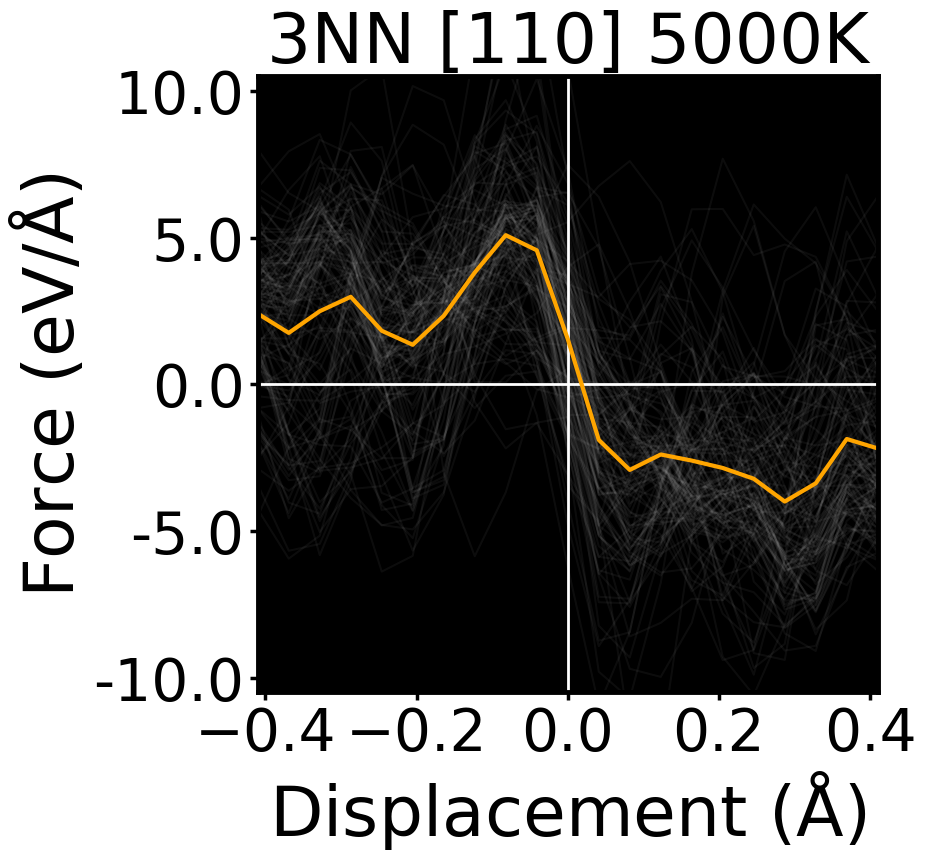

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('xtick.major', size=6, width=2.5)
plt.rc('ytick.major', size=6, width=2.5)
plt.rc('xtick.minor', size=4, width=1.5)
plt.rc('ytick.minor', size=4, width=1.5)

# Derivative fit for a polynomial
def der(fit, x):
    poly = 0
    for i in range(1, len(fit)):
        poly += i * fit[len(fit) - i - 1] * (x ** (i - 1))
    return poly

np.random.seed(0)
nstep = np.random.choice(range(220))
avg_residue = 0
ts = 20  # Number of steps
max_displacement = 0.41
min_displacement = -0.41
step = (max_displacement - min_displacement) / ts
var = np.linspace(min_displacement - step, max_displacement + step, num=ts + 3)
a_deriv = np.zeros((128, 6, ts + 1))  # Analytical derivative
formatted_directions = ['[011]', '[0-11]', '[101]','[-101]','[110]','[-110]']


# Select direction and approximation ([1 1 0] for 3NN)
selected_direction = 4  # [1 1 0] corresponds to index 4
#approximation_type = 'Numerical Approx.'

# Create the figure
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_facecolor('black')
ax.axhline(y=0, color='w', linewidth=2)  # Thicker white line
ax.axvline(x=0, color='w', linewidth=2)  # Thicker white line
ax.set_xlim([min_displacement, max_displacement])
ax.set_ylim([-10.5, 10.5])  # Adjusted limits

# Set y-axis ticks with 1 decimal place and bold style
ax.set_yticks([-10.0, -5.0, 0.0, 5.0, 10.0])
ax.set_yticklabels([f"{tick:.1f}" for tick in [-10.0, -5.0, 0.0, 5.0, 10.0]], fontdict={'weight': 'regular'})


# Set x-axis and y-axis tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('regular')
    label.set_fontsize(42)
for label in ax.get_yticklabels():
    label.set_fontweight('regular')
    label.set_fontsize(42)

# Title and labels with increased font weight and size
ax.set_title(f'3NN {formatted_directions[selected_direction]} 5000K', fontsize=50, fontweight='regular')
ax.set_xlabel(r'Displacement ($\mathrm{\AA}$)', fontsize=50, fontweight='regular')
ax.set_ylabel(r'Force (eV/$\mathrm{\AA}$)', fontsize=50, fontweight='regular')

# Make the x and y axis lines (spines) thicker
for spine in ax.spines.values():
    spine.set_linewidth(3.5)  # Further increased thickness to match the title and labels

# Load data
dir = '/content/drive/MyDrive/QE_Fe/PBE/High-pressure/2.49_5000K/'
derivative = np.load(dir + '3_NN_Forces_idlt_' + str(nstep) + '_200.npy')
prediction = np.load(dir + '3_NN_Energies_idlt_' + str(nstep) + '_200.npy')

# Plot the data for the selected direction
avg = np.zeros(ts + 1)
for i in range(128):
    #ax.plot(var[1:ts + 2], -derivative[i, selected_direction, :], '-w', alpha=0.05, linewidth=1.5)  # Increased white line thickness
    #avg -= derivative[i, selected_direction, :]

    y_data = -derivative[i, selected_direction, :ts + 1]  # Slice to match the size of var[1:ts + 2]
    ax.plot(var[1:ts + 2], y_data, '-w', alpha=0.05, linewidth=1.5)  # Plot with adjusted y_data
    avg += y_data

avg /= 128
ax.plot(var[1:ts + 2], avg, color='orange', linestyle='-', linewidth=3)  # Thicker orange line

# Calculate and plot analytical derivatives if required
for i in range(128):
    fit, residuals, _, _, _ = np.polyfit(
        var[1:ts + 2], prediction[(6 * i + selected_direction) * (ts + 3) + 1: (6 * i + selected_direction) * (ts + 3) + ts + 2],
        10, full=True
    )
    avg_residue += residuals[0]
    a_deriv[i, selected_direction, :] = der(fit, var[1:ts + 2])

plt.savefig(dir + '3_NN_Forces_Single.png')
avg_residue /= 128 * 3 * 2
print(f'Average Residue: {avg_residue}')


Average Residue: 0.02512902220369398


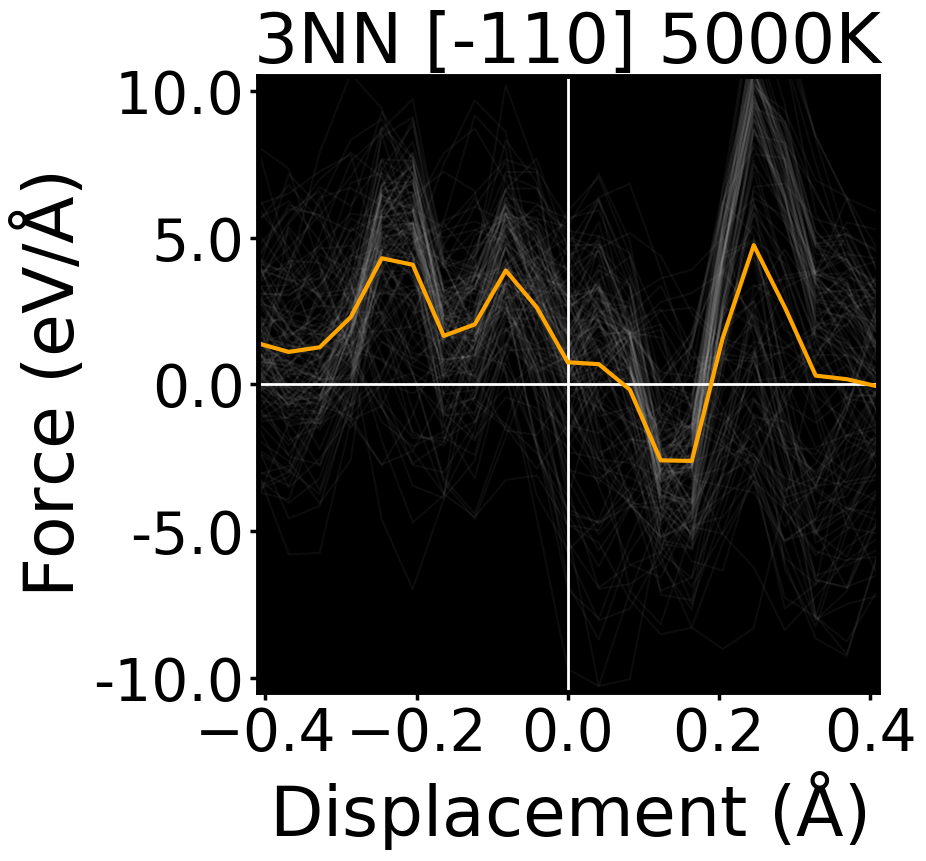

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('xtick.major', size=6, width=2.5)
plt.rc('ytick.major', size=6, width=2.5)
plt.rc('xtick.minor', size=4, width=1.5)
plt.rc('ytick.minor', size=4, width=1.5)

# Derivative fit for a polynomial
def der(fit, x):
    poly = 0
    for i in range(1, len(fit)):
        poly += i * fit[len(fit) - i - 1] * (x ** (i - 1))
    return poly

np.random.seed(0)
nstep = np.random.choice(range(220))
avg_residue = 0
ts = 20  # Number of steps
max_displacement = 0.41
min_displacement = -0.41
step = (max_displacement - min_displacement) / ts
var = np.linspace(min_displacement - step, max_displacement + step, num=ts + 3)
a_deriv = np.zeros((128, 6, ts + 1))  # Analytical derivative
formatted_directions = ['[011]', '[0-11]', '[101]','[-101]','[110]','[-110]']

# Select direction and approximation ([-1 1 0] for 3NN)
selected_direction = 5  # [-1 1 0] corresponds to index 5
#approximation_type = 'Numerical Approx.'

# Create the figure
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_facecolor('black')
ax.axhline(y=0, color='w', linewidth=2)  # Thicker white line
ax.axvline(x=0, color='w', linewidth=2)  # Thicker white line
ax.set_xlim([min_displacement, max_displacement])
ax.set_ylim([-10.5, 10.5])  # Adjusted limits

# Set y-axis ticks with 1 decimal place and bold style
ax.set_yticks([-10.0, -5.0, 0.0, 5.0, 10.0])
ax.set_yticklabels([f"{tick:.1f}" for tick in [-10.0, -5.0, 0.0, 5.0, 10.0]], fontdict={'weight': 'regular'})

# Set x-axis and y-axis tick labels
for label in ax.get_xticklabels():
    label.set_fontweight('regular')
    label.set_fontsize(42)
for label in ax.get_yticklabels():
    label.set_fontweight('regular')
    label.set_fontsize(42)

# Title and labels with increased font weight and size
ax.set_title(f'3NN {formatted_directions[selected_direction]} 5000K', fontsize=50, fontweight='regular')
ax.set_xlabel(r'Displacement ($\mathrm{\AA}$)', fontsize=50, fontweight='regular')
ax.set_ylabel(r'Force (eV/$\mathrm{\AA}$)', fontsize=50, fontweight='regular')

# Make the x and y axis lines (spines) thicker
for spine in ax.spines.values():
    spine.set_linewidth(3.5)  # Further increased thickness to match the title and labels

# Load data
dir = '/content/drive/MyDrive/QE_Fe/PBE/High-pressure/2.49_5000K/'
derivative = np.load(dir + '3_NN_Forces_idlt_' + str(nstep) + '_200.npy')
prediction = np.load(dir + '3_NN_Energies_idlt_' + str(nstep) + '_200.npy')

# Plot the data for the selected direction
avg = np.zeros(ts + 1)
for i in range(128):
    #ax.plot(var[1:ts + 2], -derivative[i, selected_direction, :], '-w', alpha=0.05, linewidth=1.5)  # Increased white line thickness
    #avg -= derivative[i, selected_direction, :]

    y_data = -derivative[i, selected_direction, :ts + 1]  # Slice to match the size of var[1:ts + 2]
    ax.plot(var[1:ts + 2], y_data, '-w', alpha=0.05, linewidth=1.5)  # Plot with adjusted y_data
    avg += y_data

avg /= 128
ax.plot(var[1:ts + 2], avg, color='orange', linestyle='-', linewidth=3)  # Thicker orange line

# Calculate and plot analytical derivatives if required
for i in range(128):
    fit, residuals, _, _, _ = np.polyfit(
        var[1:ts + 2], prediction[(6 * i + selected_direction) * (ts + 3) + 1: (6 * i + selected_direction) * (ts + 3) + ts + 2],
        10, full=True
    )
    avg_residue += residuals[0]
    a_deriv[i, selected_direction, :] = der(fit, var[1:ts + 2])

plt.savefig(dir + '3_NN_Forces_Single.png')
avg_residue /= 128 * 3 * 2
print(f'Average Residue: {avg_residue}')


Average Residue: 0.1560224563373981


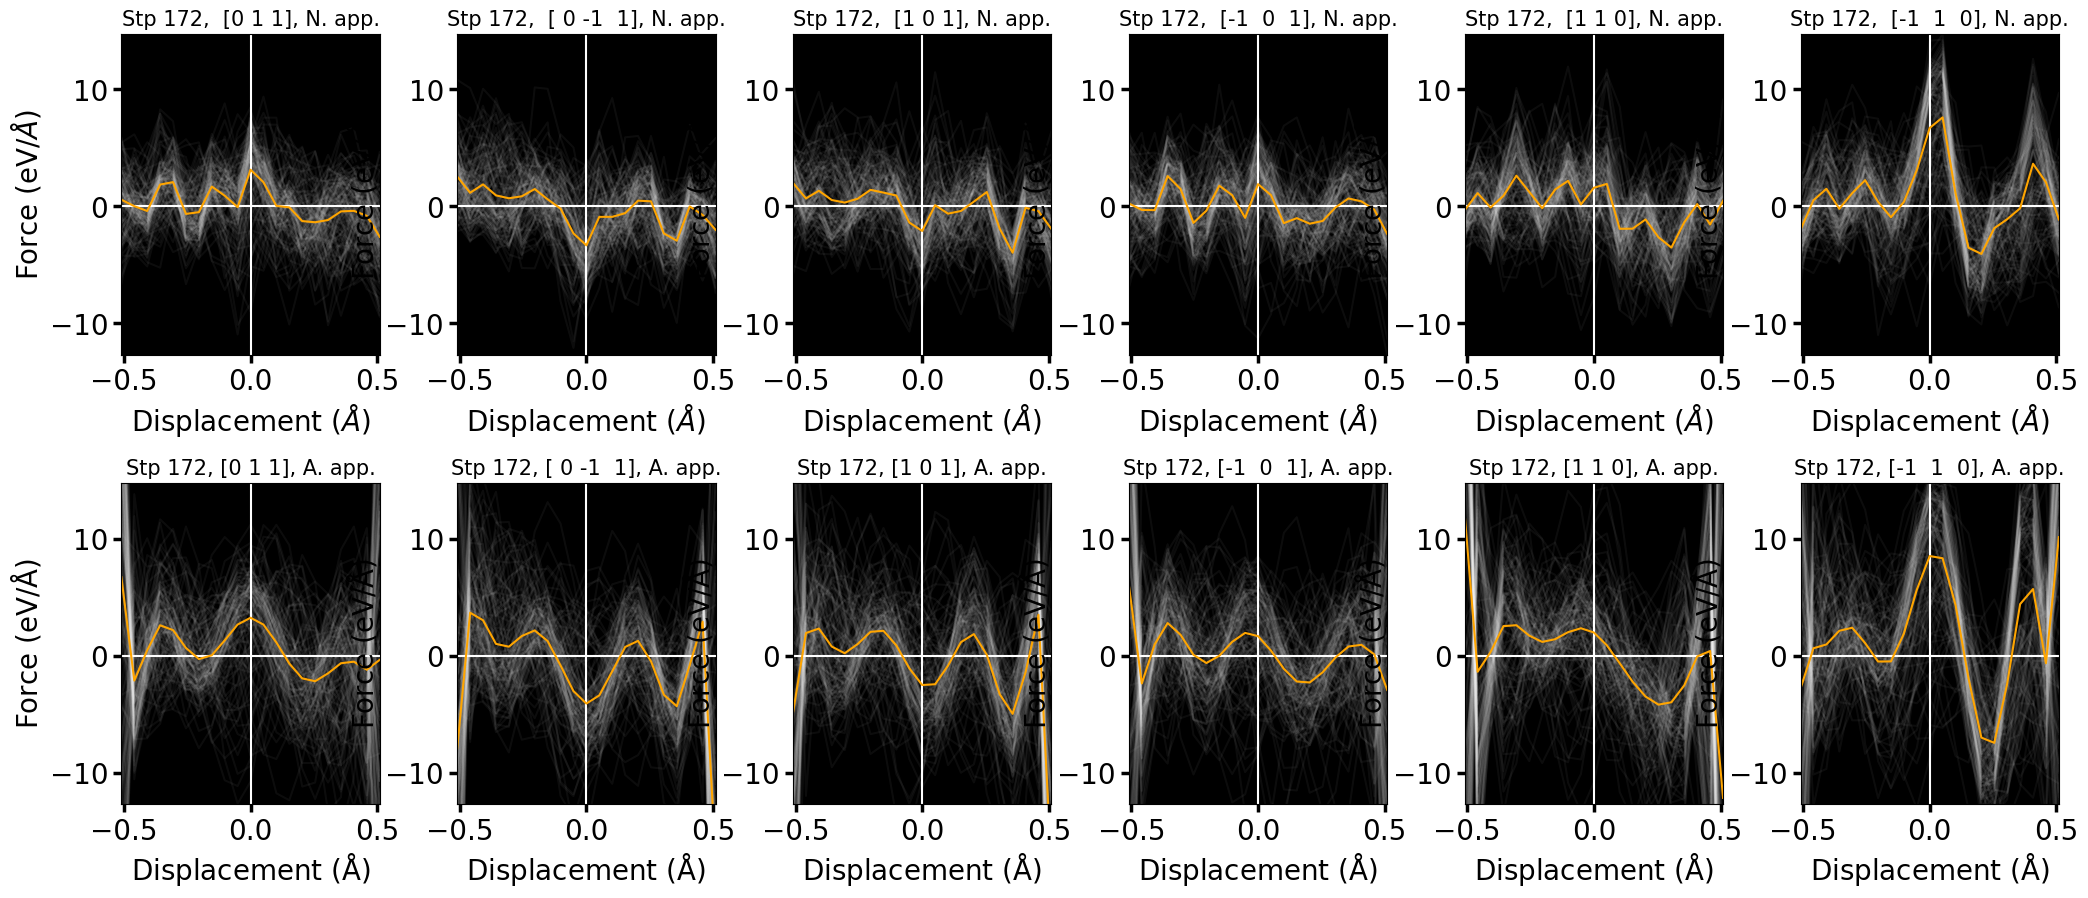

In [ ]:
"""
import numpy as np
import matplotlib.pyplot as plt

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('xtick.major', size=6, width=2.5)
plt.rc('ytick.major', size=6, width=2.5)
plt.rc('xtick.minor', size=4, width=1.5)
plt.rc('ytick.minor', size=4, width=1.5)


# Derivative fit for a polynomial
def der(fit, x):
    poly = 0
    for i in range(1, len(fit)):
        poly += i * fit[len(fit) - i - 1] * (x ** (i - 1))
    return poly

np.random.seed(0)
nstep = np.random.choice(range(220))
avg_residue = 0
ts = 20  # Number of steps
max_displacement = 0.51
min_displacement = -0.51
step = (max_displacement - min_displacement) / ts
var = np.linspace(min_displacement - step, max_displacement + step, num=ts + 3)
a_deriv = np.zeros((128, 6, ts + 1))  # Analytical derivative

# Axes of interest for 3NN
m = [
    np.array([0, 1, 1]), np.array([0, -1, 1]),
    np.array([1, 0, 1]), np.array([-1, 0, 1]),
    np.array([1, 1, 0]), np.array([-1, 1, 0])
]
p = 0  # Counter to iterate through the plot grid

# Create the figure with adjusted layout
fig, ax = plt.subplots(2, 6, figsize=(25, 10))  # Increased figure size
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust spacing between plots

# Load data
dir = '/content/drive/MyDrive/QE_Fe/PBE/High-pressure/2.36_5000K/'
derivative = np.load(dir + '3NN_Forces_idlt_' + str(nstep) + '_220.npy')
miny = np.min(-derivative[:, :, :])
maxy = np.max(-derivative[:, :, :])

for nstep in [nstep]:  # Iterate through time steps of interest
    derivative = np.load(dir + '3NN_Forces_idlt_' + str(nstep) + '_220.npy')
    prediction = np.load(dir + '3NN_Energies_idlt_' + str(nstep) + '_220.npy')

    for d in range(6):  # Iterate over the 6 axes
        ax[2 * p, d].set_facecolor('black')
        ax[2 * p, d].axhline(y=0, color='w')
        ax[2 * p, d].axvline(x=0, color='w')
        ax[2 * p, d].set_xlim([min_displacement, max_displacement])
        ax[2 * p, d].set_ylim([miny, maxy])

        # Set title and labels
        ax[2 * p, d].set_title(f'Stp {nstep},  {m[d]}, N. app.',fontsize=15)
        ax[2 * p, d].set_xlabel(r'Displacement ($\AA$)', fontsize=20)
        ax[2 * p, d].set_ylabel(r'Force (eV/$\AA$)',fontsize=20)

        avg = np.zeros(ts + 1)  # Average curve of the Force
        for i in range(128):
            ax[2 * p, d].plot(var[1:ts + 2], -derivative[i, d, :], '-w', alpha=0.05)
            avg -= derivative[i, d, :]

        avg /= 128
        ax[2 * p, d].plot(var[1:ts + 2], avg, color='orange', linestyle='-')  # Orange line

        for i in range(128):
            fit, residuals, _, _, _ = np.polyfit(
                var[1:ts + 2], prediction[(6 * i + d) * (ts + 3) + 1: (6 * i + d) * (ts + 3) + ts + 2],
                10, full=True
            )
            avg_residue += residuals[0]
            a_deriv[i, d, :] = der(fit, var[1:ts + 2])

        ax[2 * p + 1, d].set_facecolor('black')
        ax[2 * p + 1, d].axhline(y=0, color='w')
        ax[2 * p + 1, d].axvline(x=0, color='w')
        ax[2 * p + 1, d].set_xlim([min_displacement, max_displacement])
        ax[2 * p + 1, d].set_ylim([miny, maxy])

        # Set title and labels
        ax[2 * p + 1, d].set_title(f'Stp {nstep}, {m[d]}, A. app.', fontsize=15)
        ax[2 * p + 1, d].set_xlabel(r'Displacement ($\mathrm{\AA}$)',fontsize=20)
        ax[2 * p + 1, d].set_ylabel(r'Force (eV/$\mathrm{\AA}$)',fontsize=20)

        avg = np.zeros(ts + 1)  # Average curve of the Force
        for i in range(128):
            ax[2 * p + 1, d].plot(var[1:ts + 2], -a_deriv[i, d, :], '-w', alpha=0.05)
            avg -= a_deriv[i, d, :]

        avg /= 128
        ax[2 * p + 1, d].plot(var[1:ts + 2], avg, color='orange', linestyle='-')  # Orange line

    p += 1

plt.savefig(dir + '3NN_Forces_Updated.png')
avg_residue /= 128 * 6 * 2
print(f'Average Residue: {avg_residue}')

"""